In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot

C:\Users\leoar\AppData\Local\Temp\ipykernel_22008\2117630889.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "COVIDx CT-2A"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,9


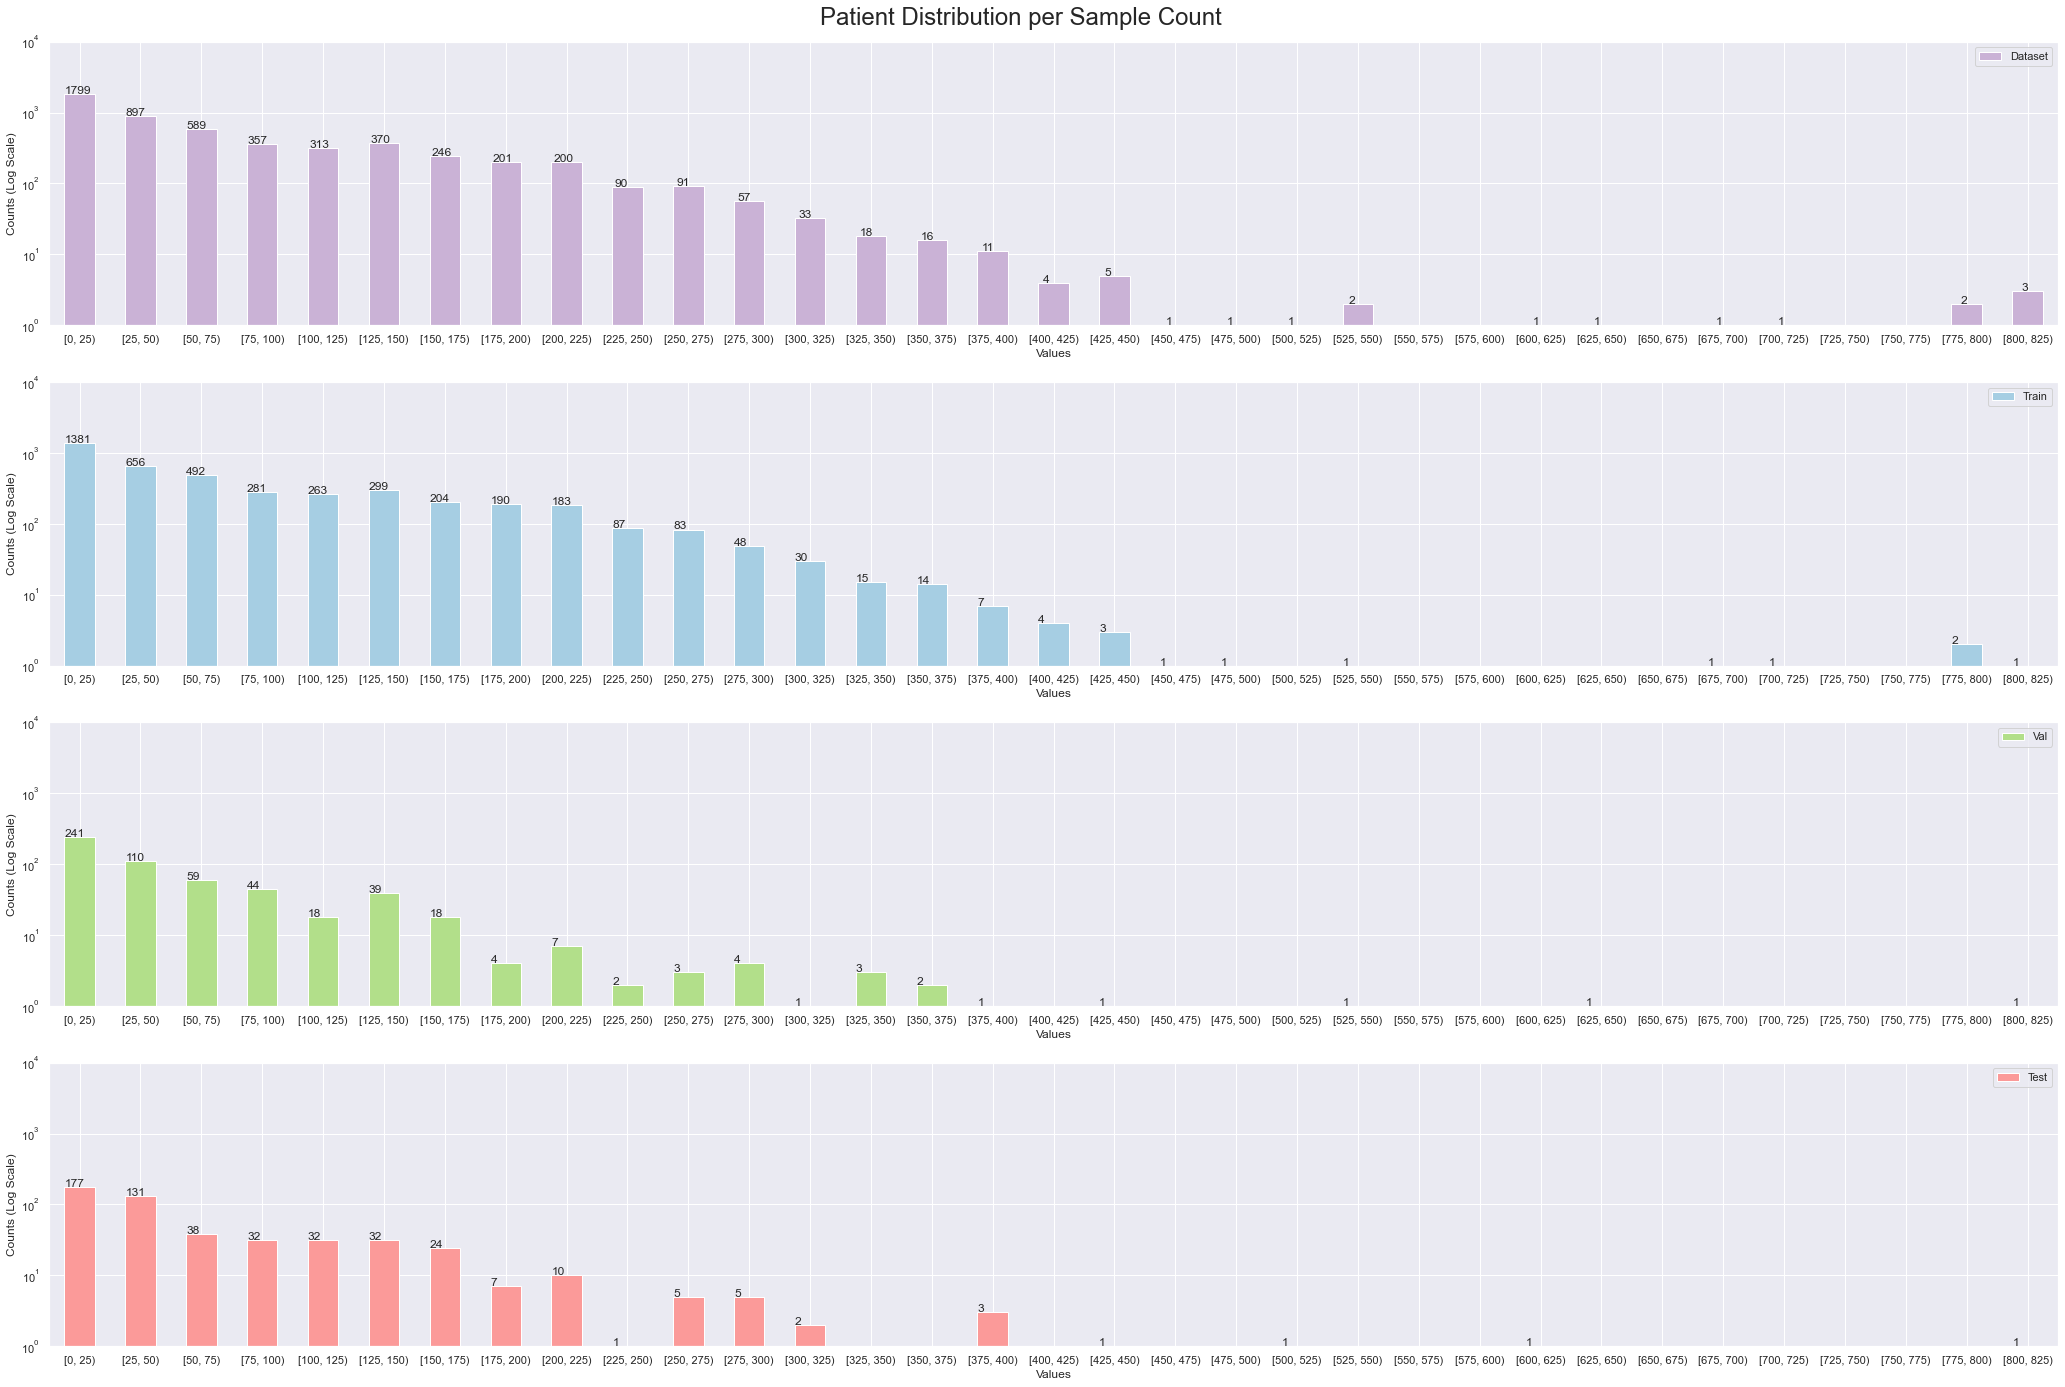

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",1799,1381,241,177
"[25, 50)",897,656,110,131
"[50, 75)",589,492,59,38
"[75, 100)",357,281,44,32
"[100, 125)",313,263,18,32
"[125, 150)",370,299,39,32
"[150, 175)",246,204,18,24
"[175, 200)",201,190,4,7
"[200, 225)",200,183,7,10


# Plots

## Source

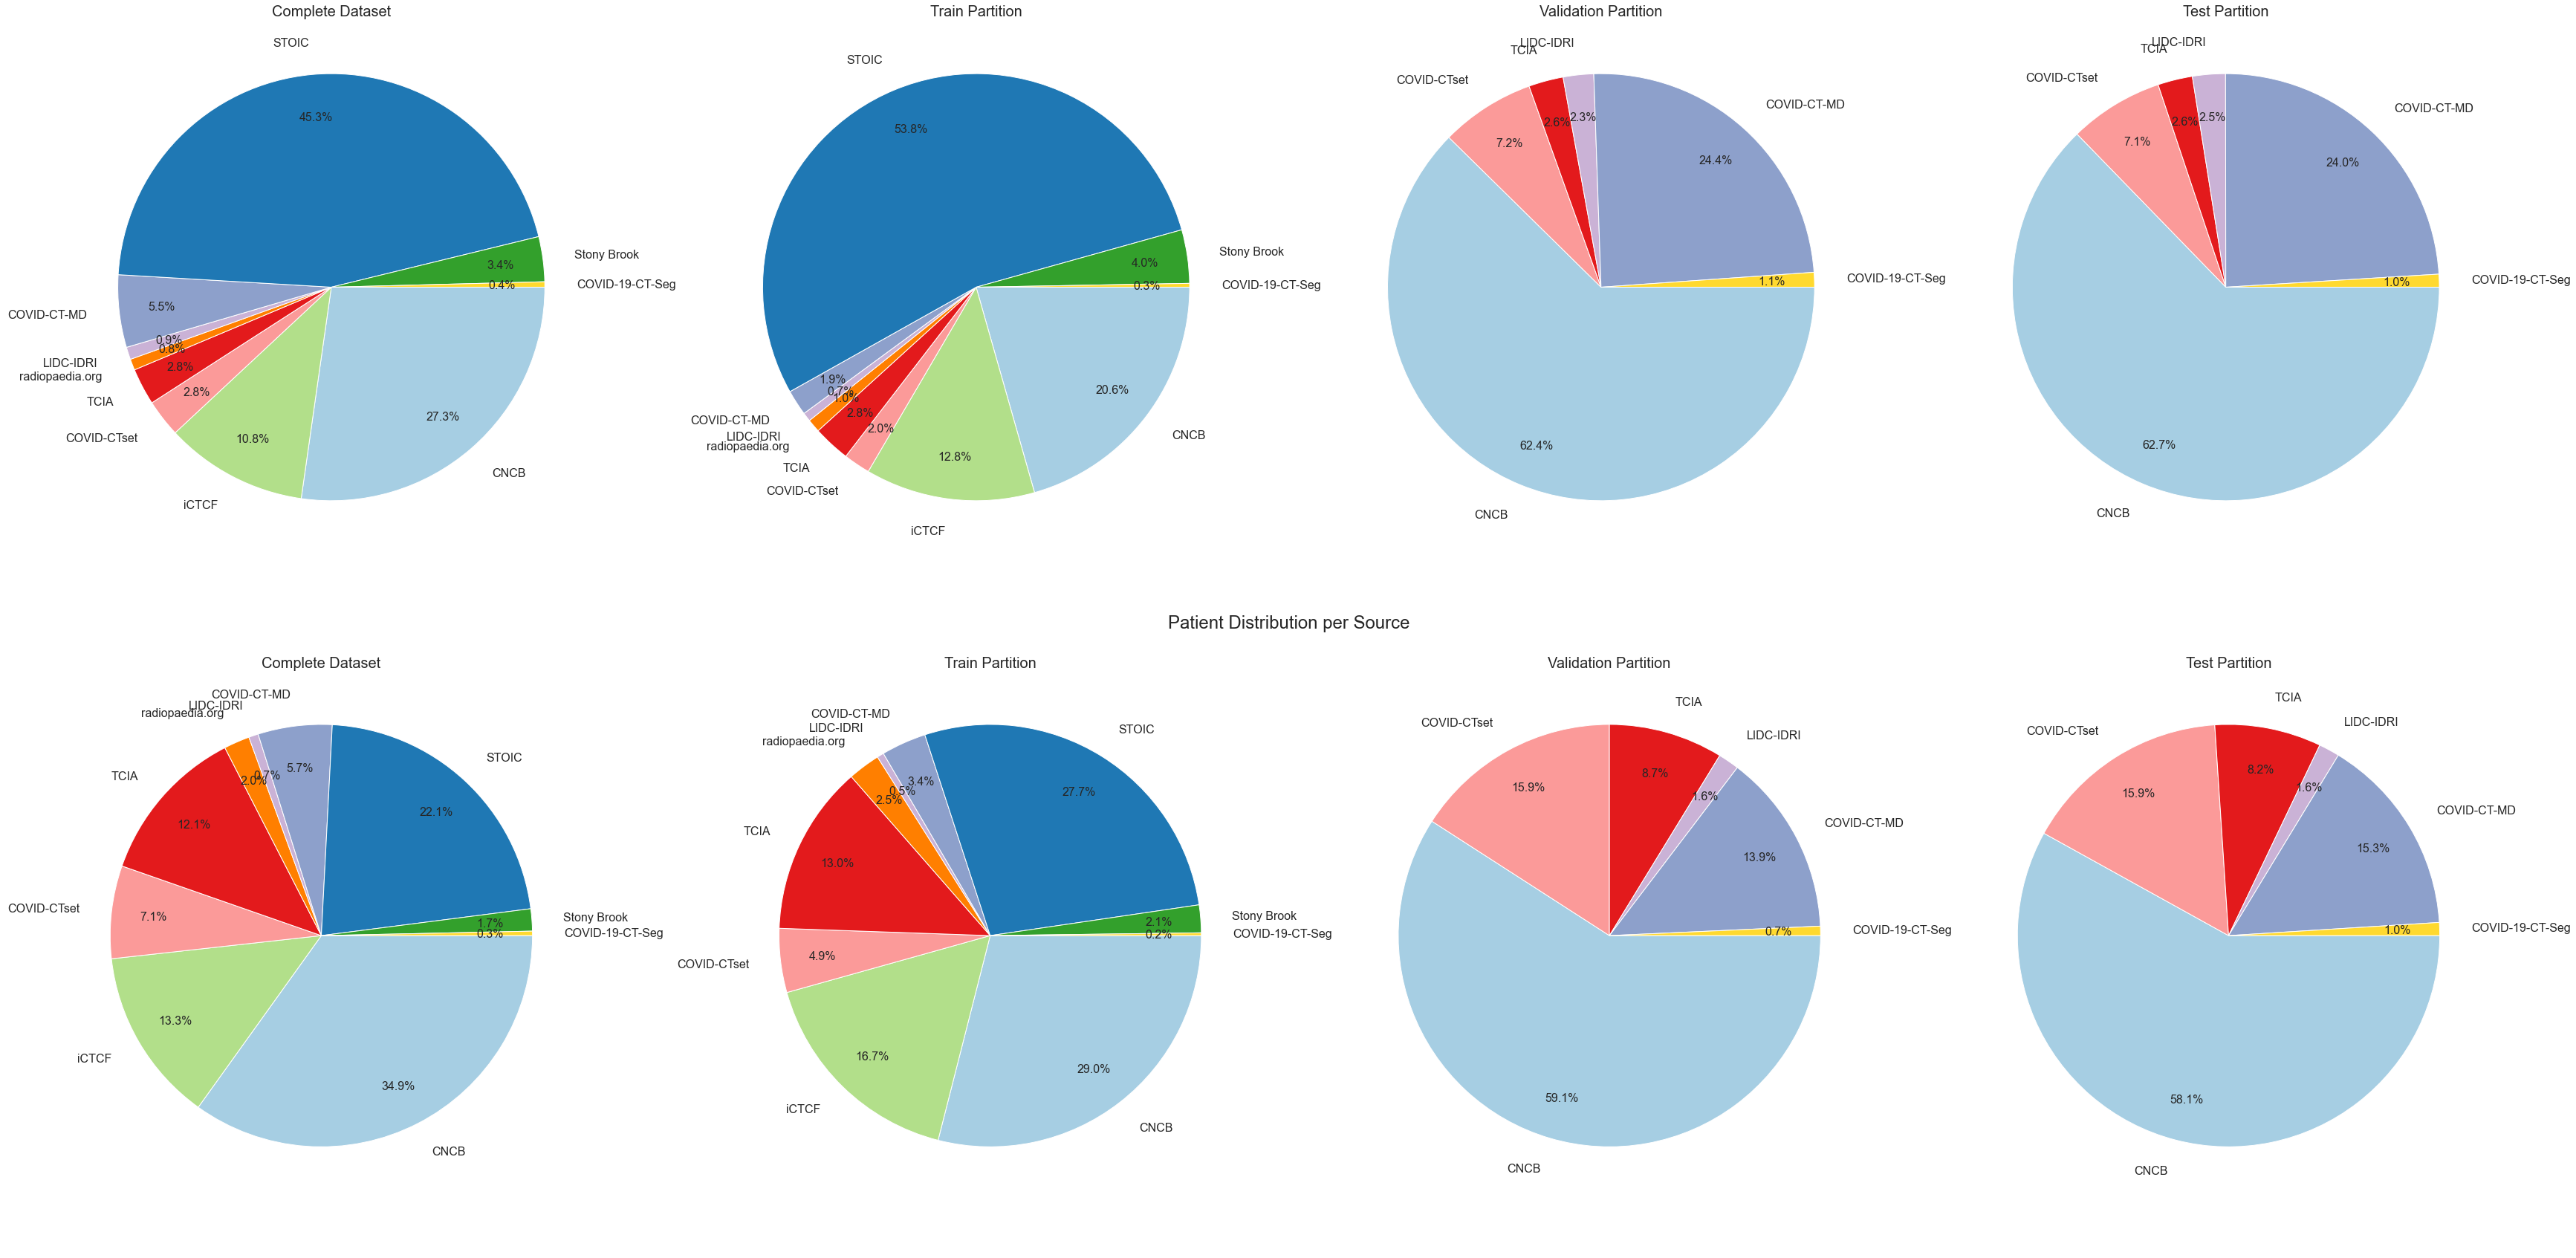

In [7]:
plot.column_as_pies( samples_df, patient_df, "source", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "source", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
STOIC,192361,192361,0,0
CNCB,115837,73612,21035,21190
iCTCF,45912,45912,0,0
COVID-CT-MD,23280,6918,8239,8123
Stony Brook,14461,14461,0,0
COVID-CTset,12058,7234,2413,2411
TCIA,11816,10044,885,887
LIDC-IDRI,3999,2380,778,841
radiopaedia.org,3574,3574,0,0


## Partition

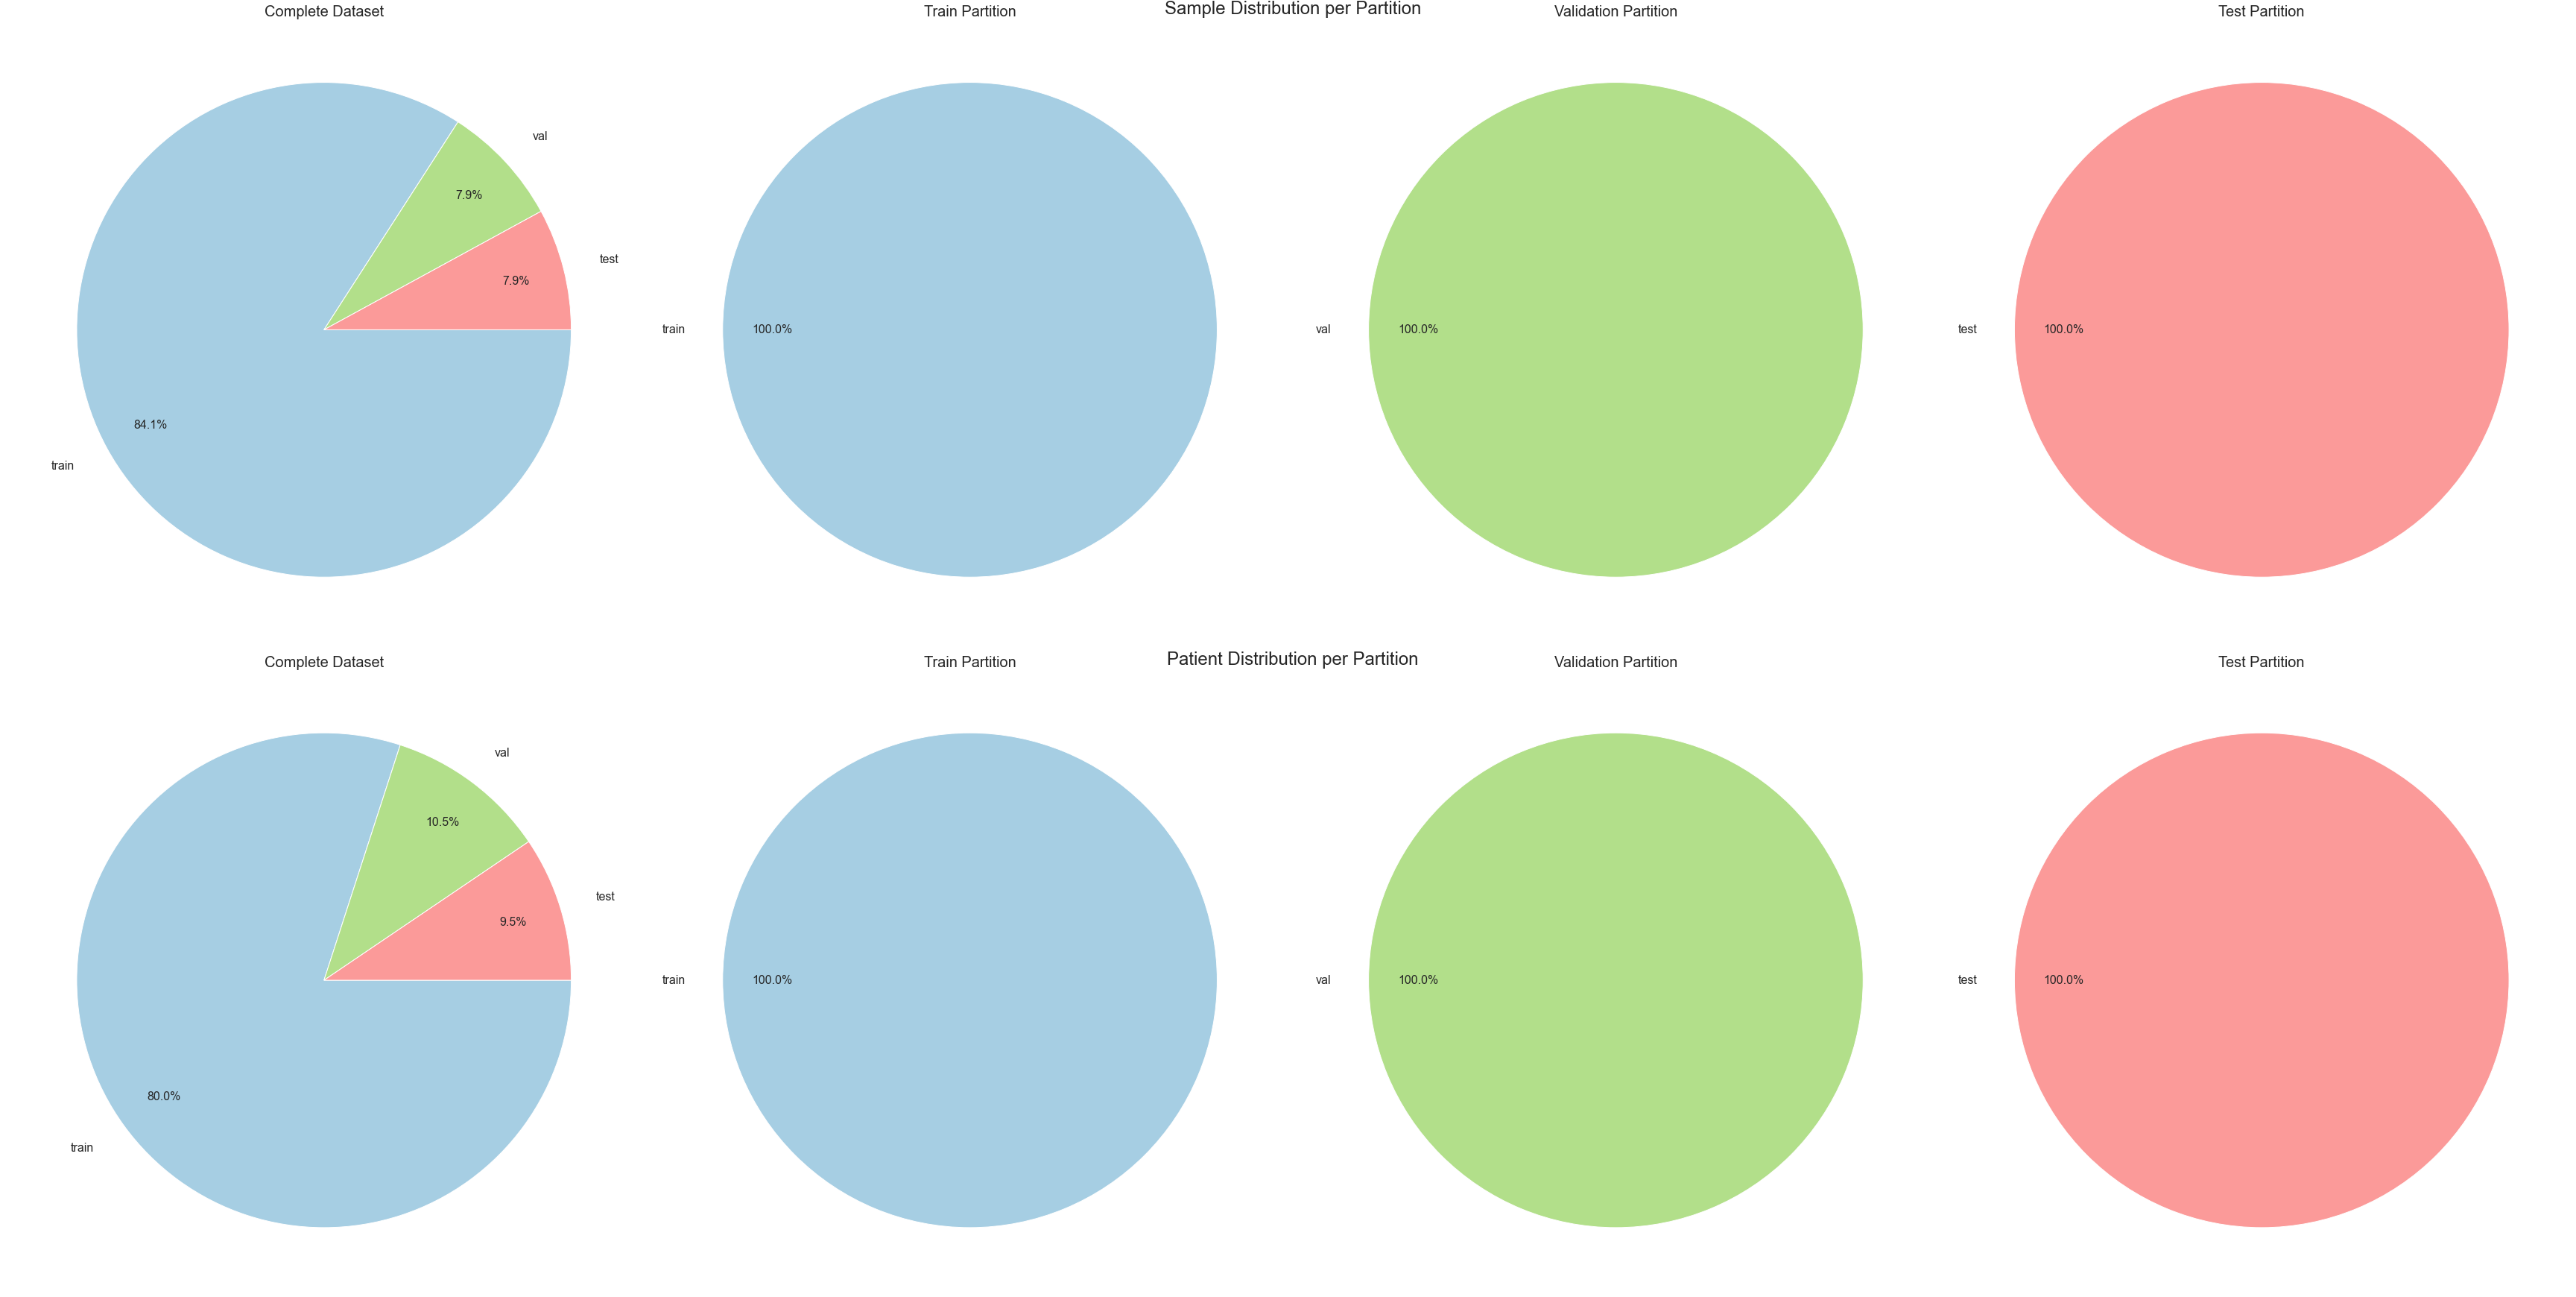

In [9]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [10]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
train,357518,357518,0,0
test,33781,0,0,33781
val,33725,0,33725,0
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
train,4249,4249,0,0
val,560,0,560,0
test,503,0,0,503


## Class

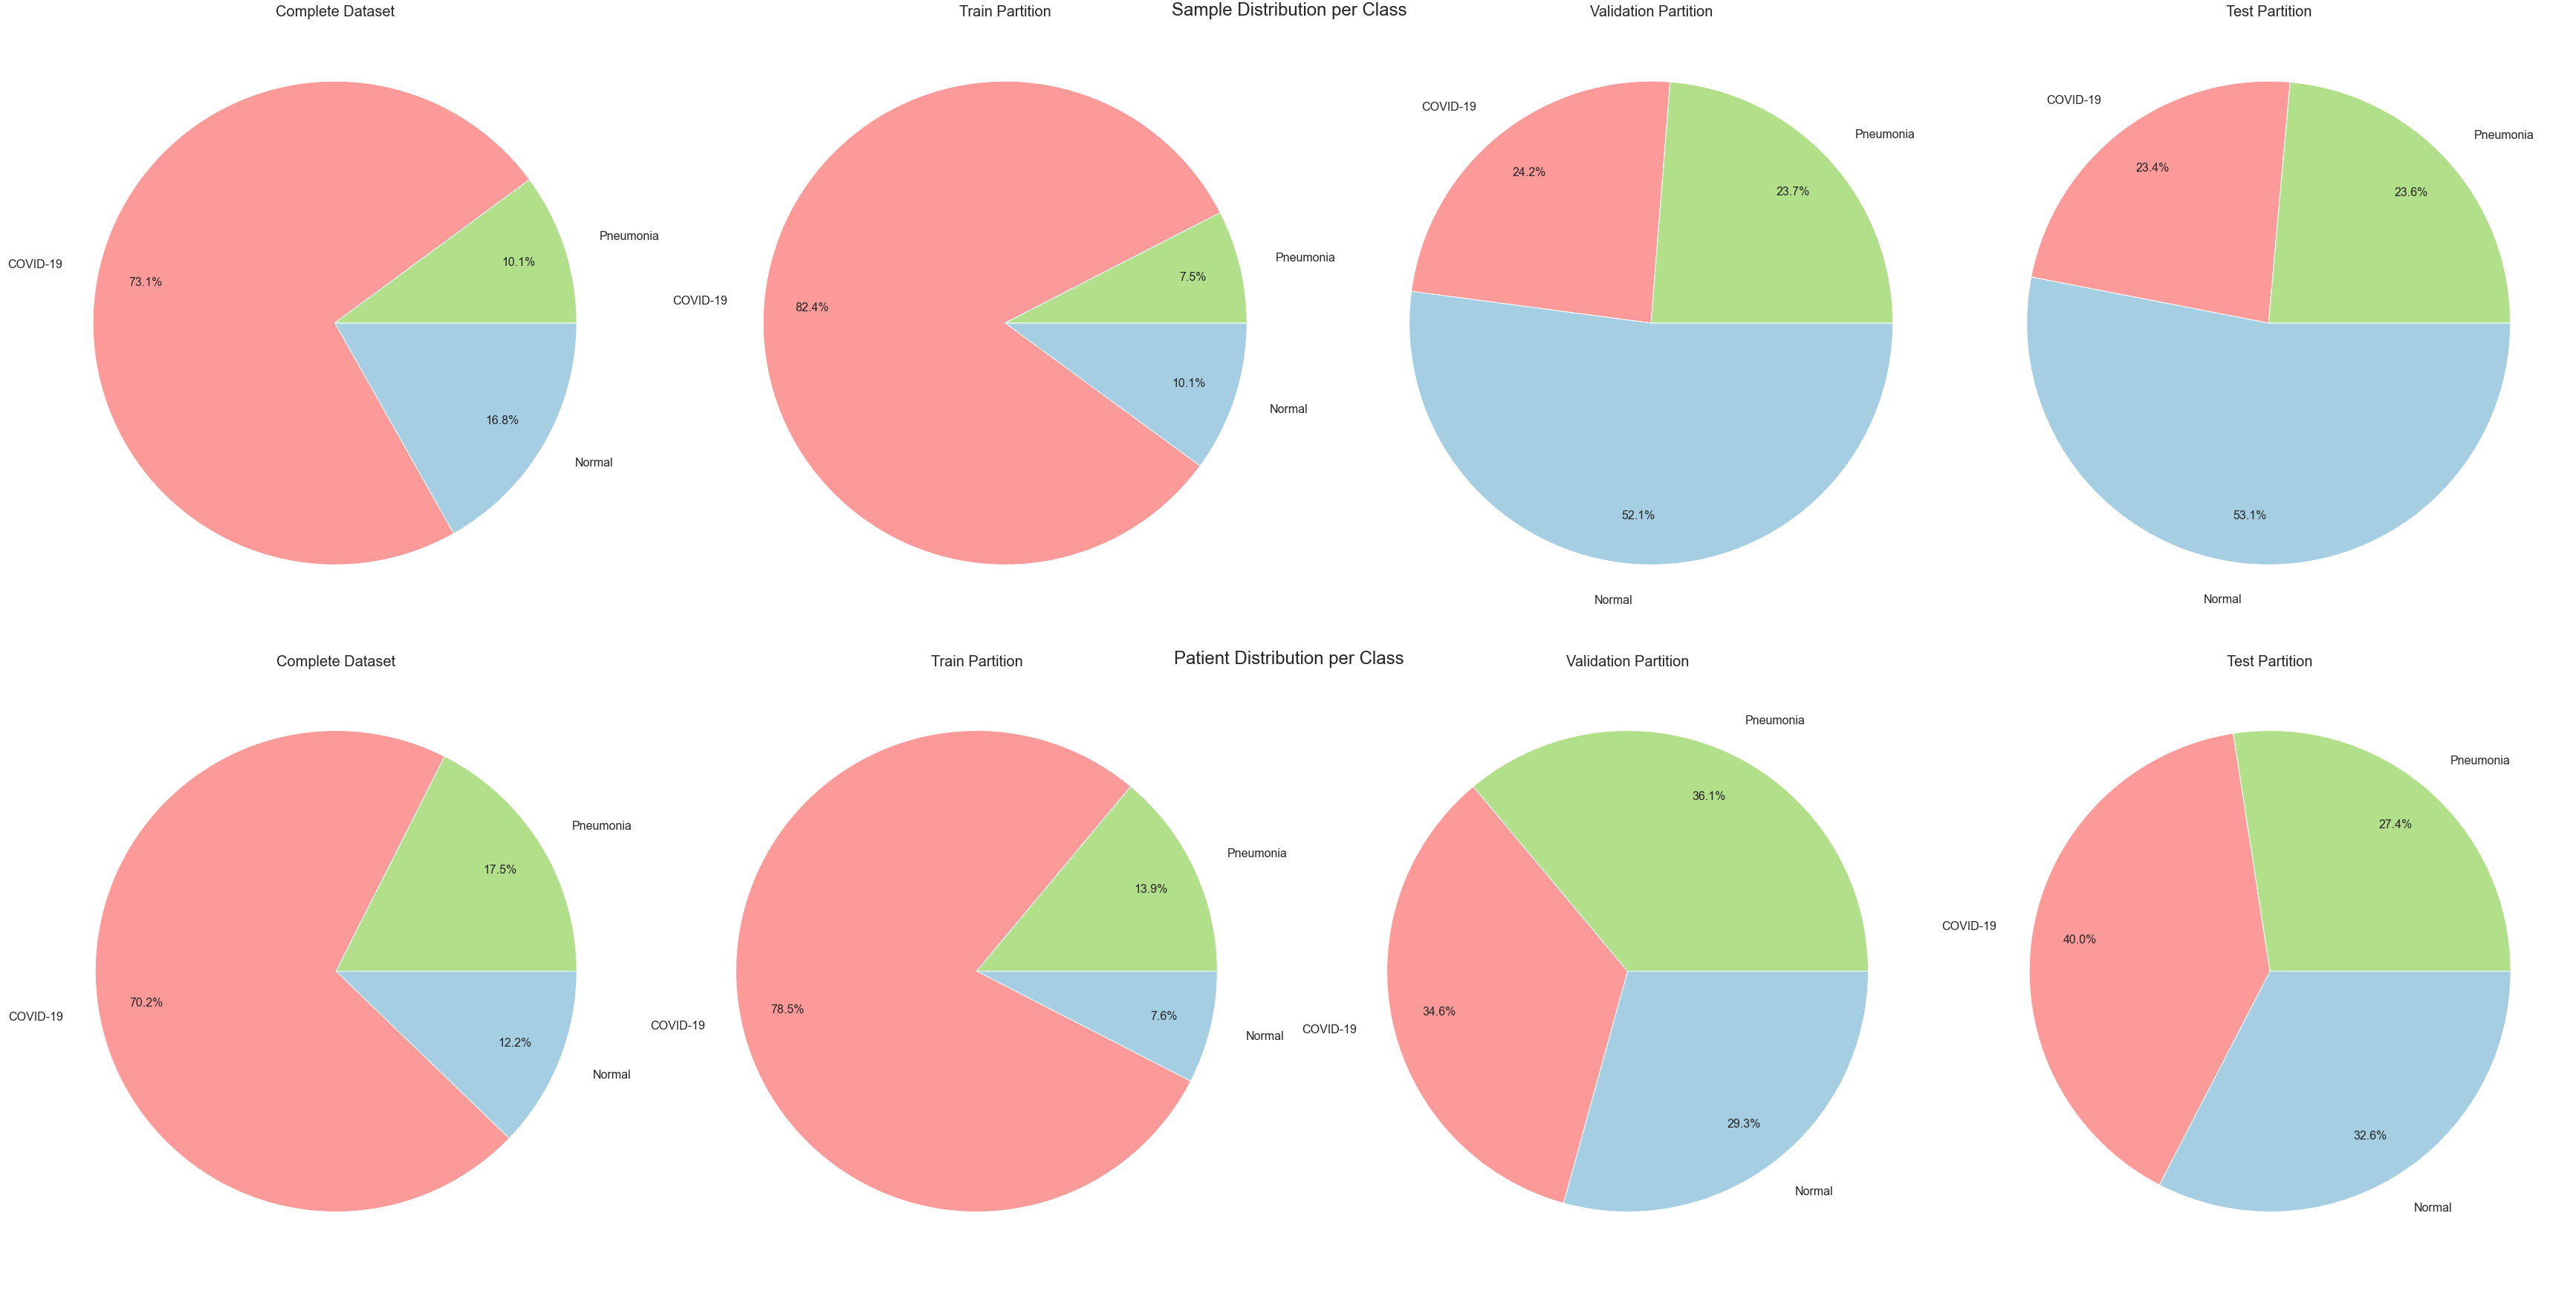

In [11]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [12]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,310593,294552,8147,7894
Normal,71488,35996,17570,17922
Pneumonia,42943,26970,8008,7965
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
COVID-19,3731,3336,194,201
Pneumonia,932,592,202,138
Normal,649,321,164,164


## Country

In [13]:
np.unique(samples_df["country"].to_list())

array(['Afghanistan', 'Algeria', 'Australia', 'Azerbaijan', 'Belgium',
       'China', 'England', 'France', 'Iran', 'Italy', 'Lebanon', 'N/A',
       'Peru', 'Scotland', 'Turkey', 'USA', 'Ukraine'], dtype='<U11')

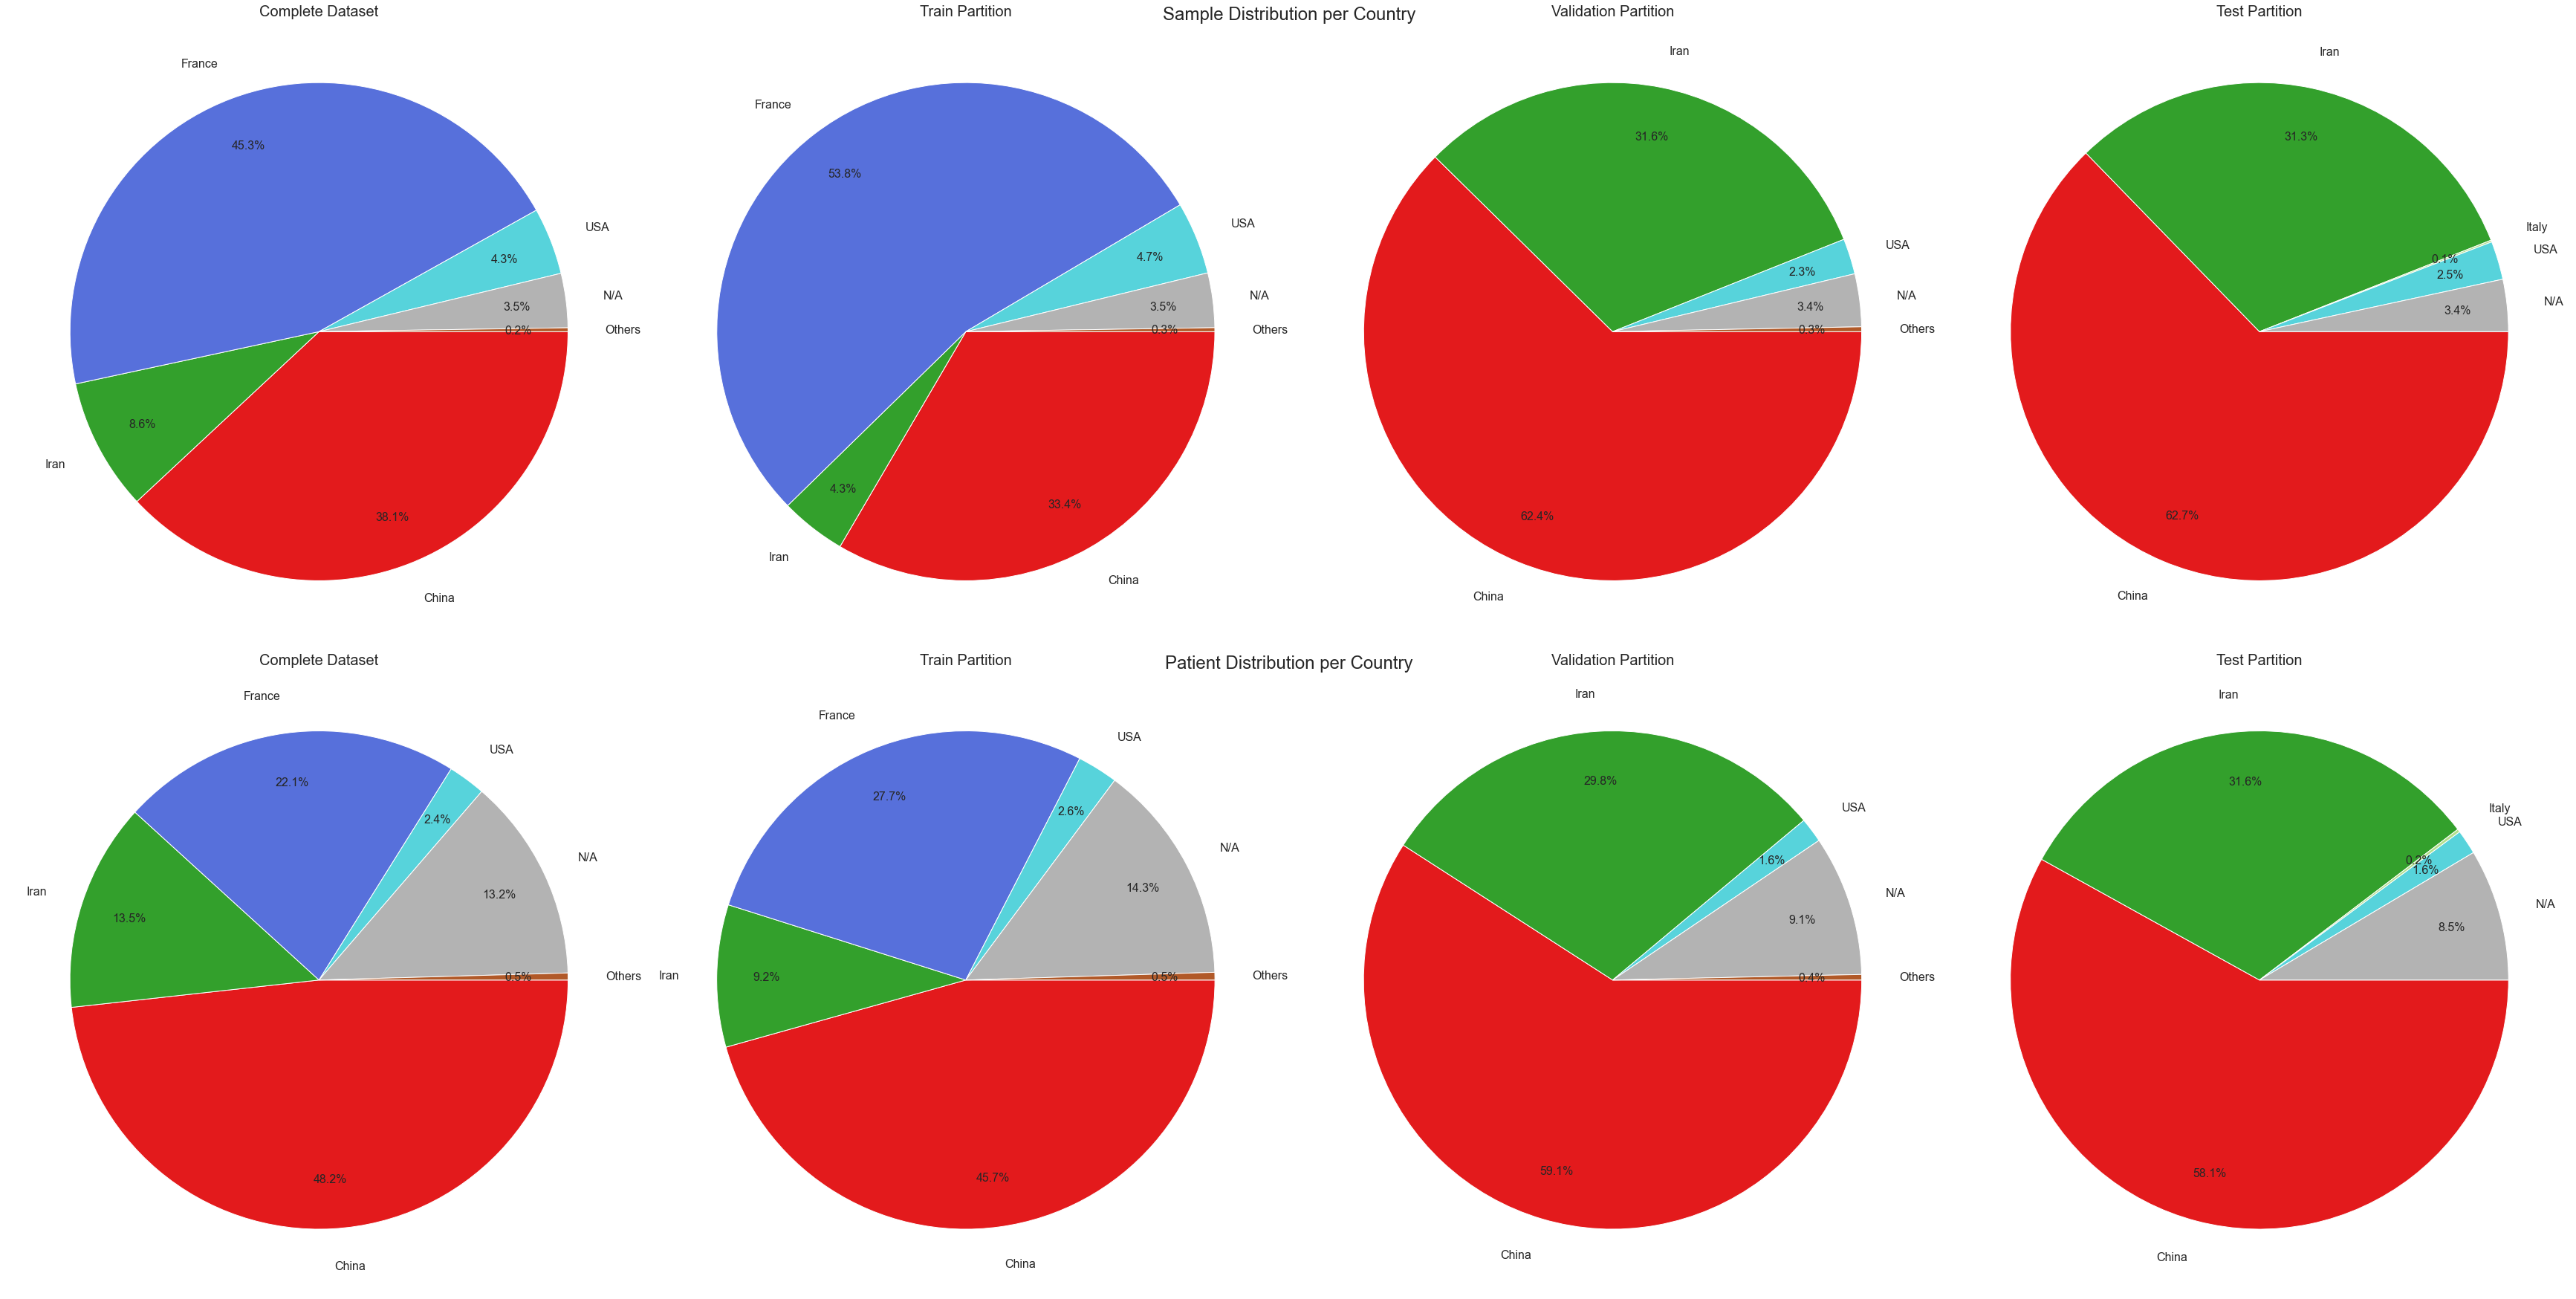

In [14]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [15]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
France,192361,192361,0,0
China,161749,119524,21035,21190
Iran,36452,15231,10652,10569
USA,18460,16841,778,841
N/A,14947,12651,1155,1141
Australia,287,287,0,0
Italy,240,200,0,40
Algeria,109,109,0,0
Belgium,72,0,72,0


## Age

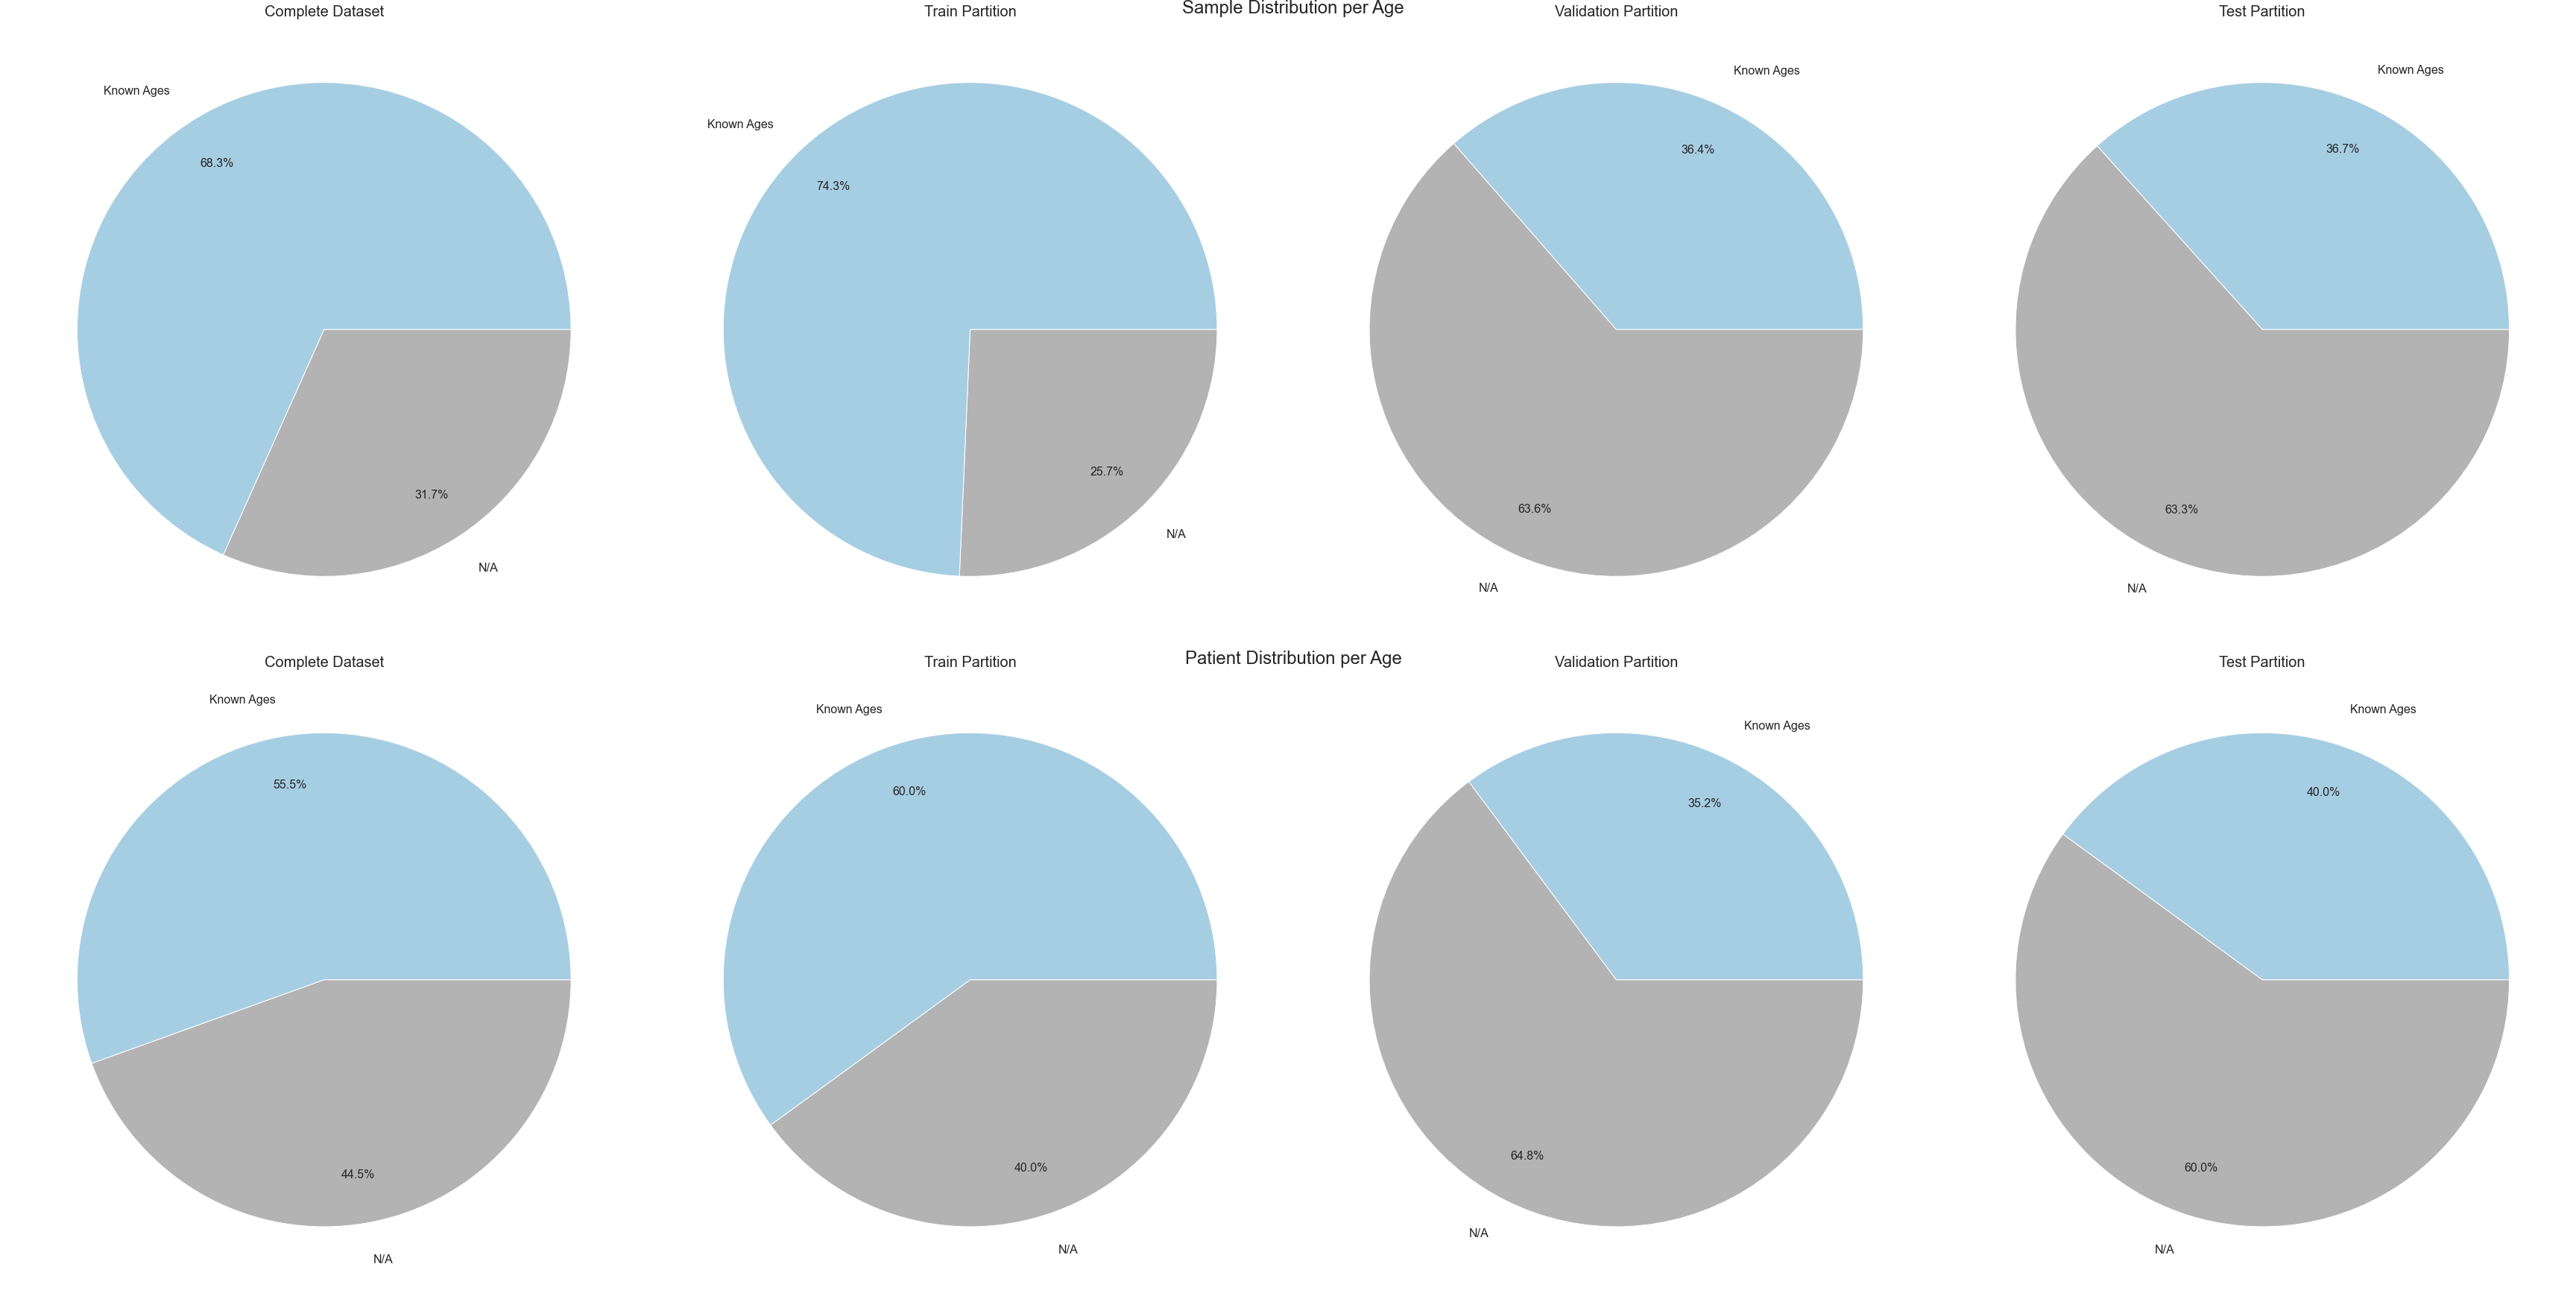

In [16]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [17]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,134694,91857,21440,21397
Known Ages,290330,265661,12285,12384
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
N/A,2364,1699,363,302
Known Ages,2948,2550,197,201
SUM,5312,4249,560,503


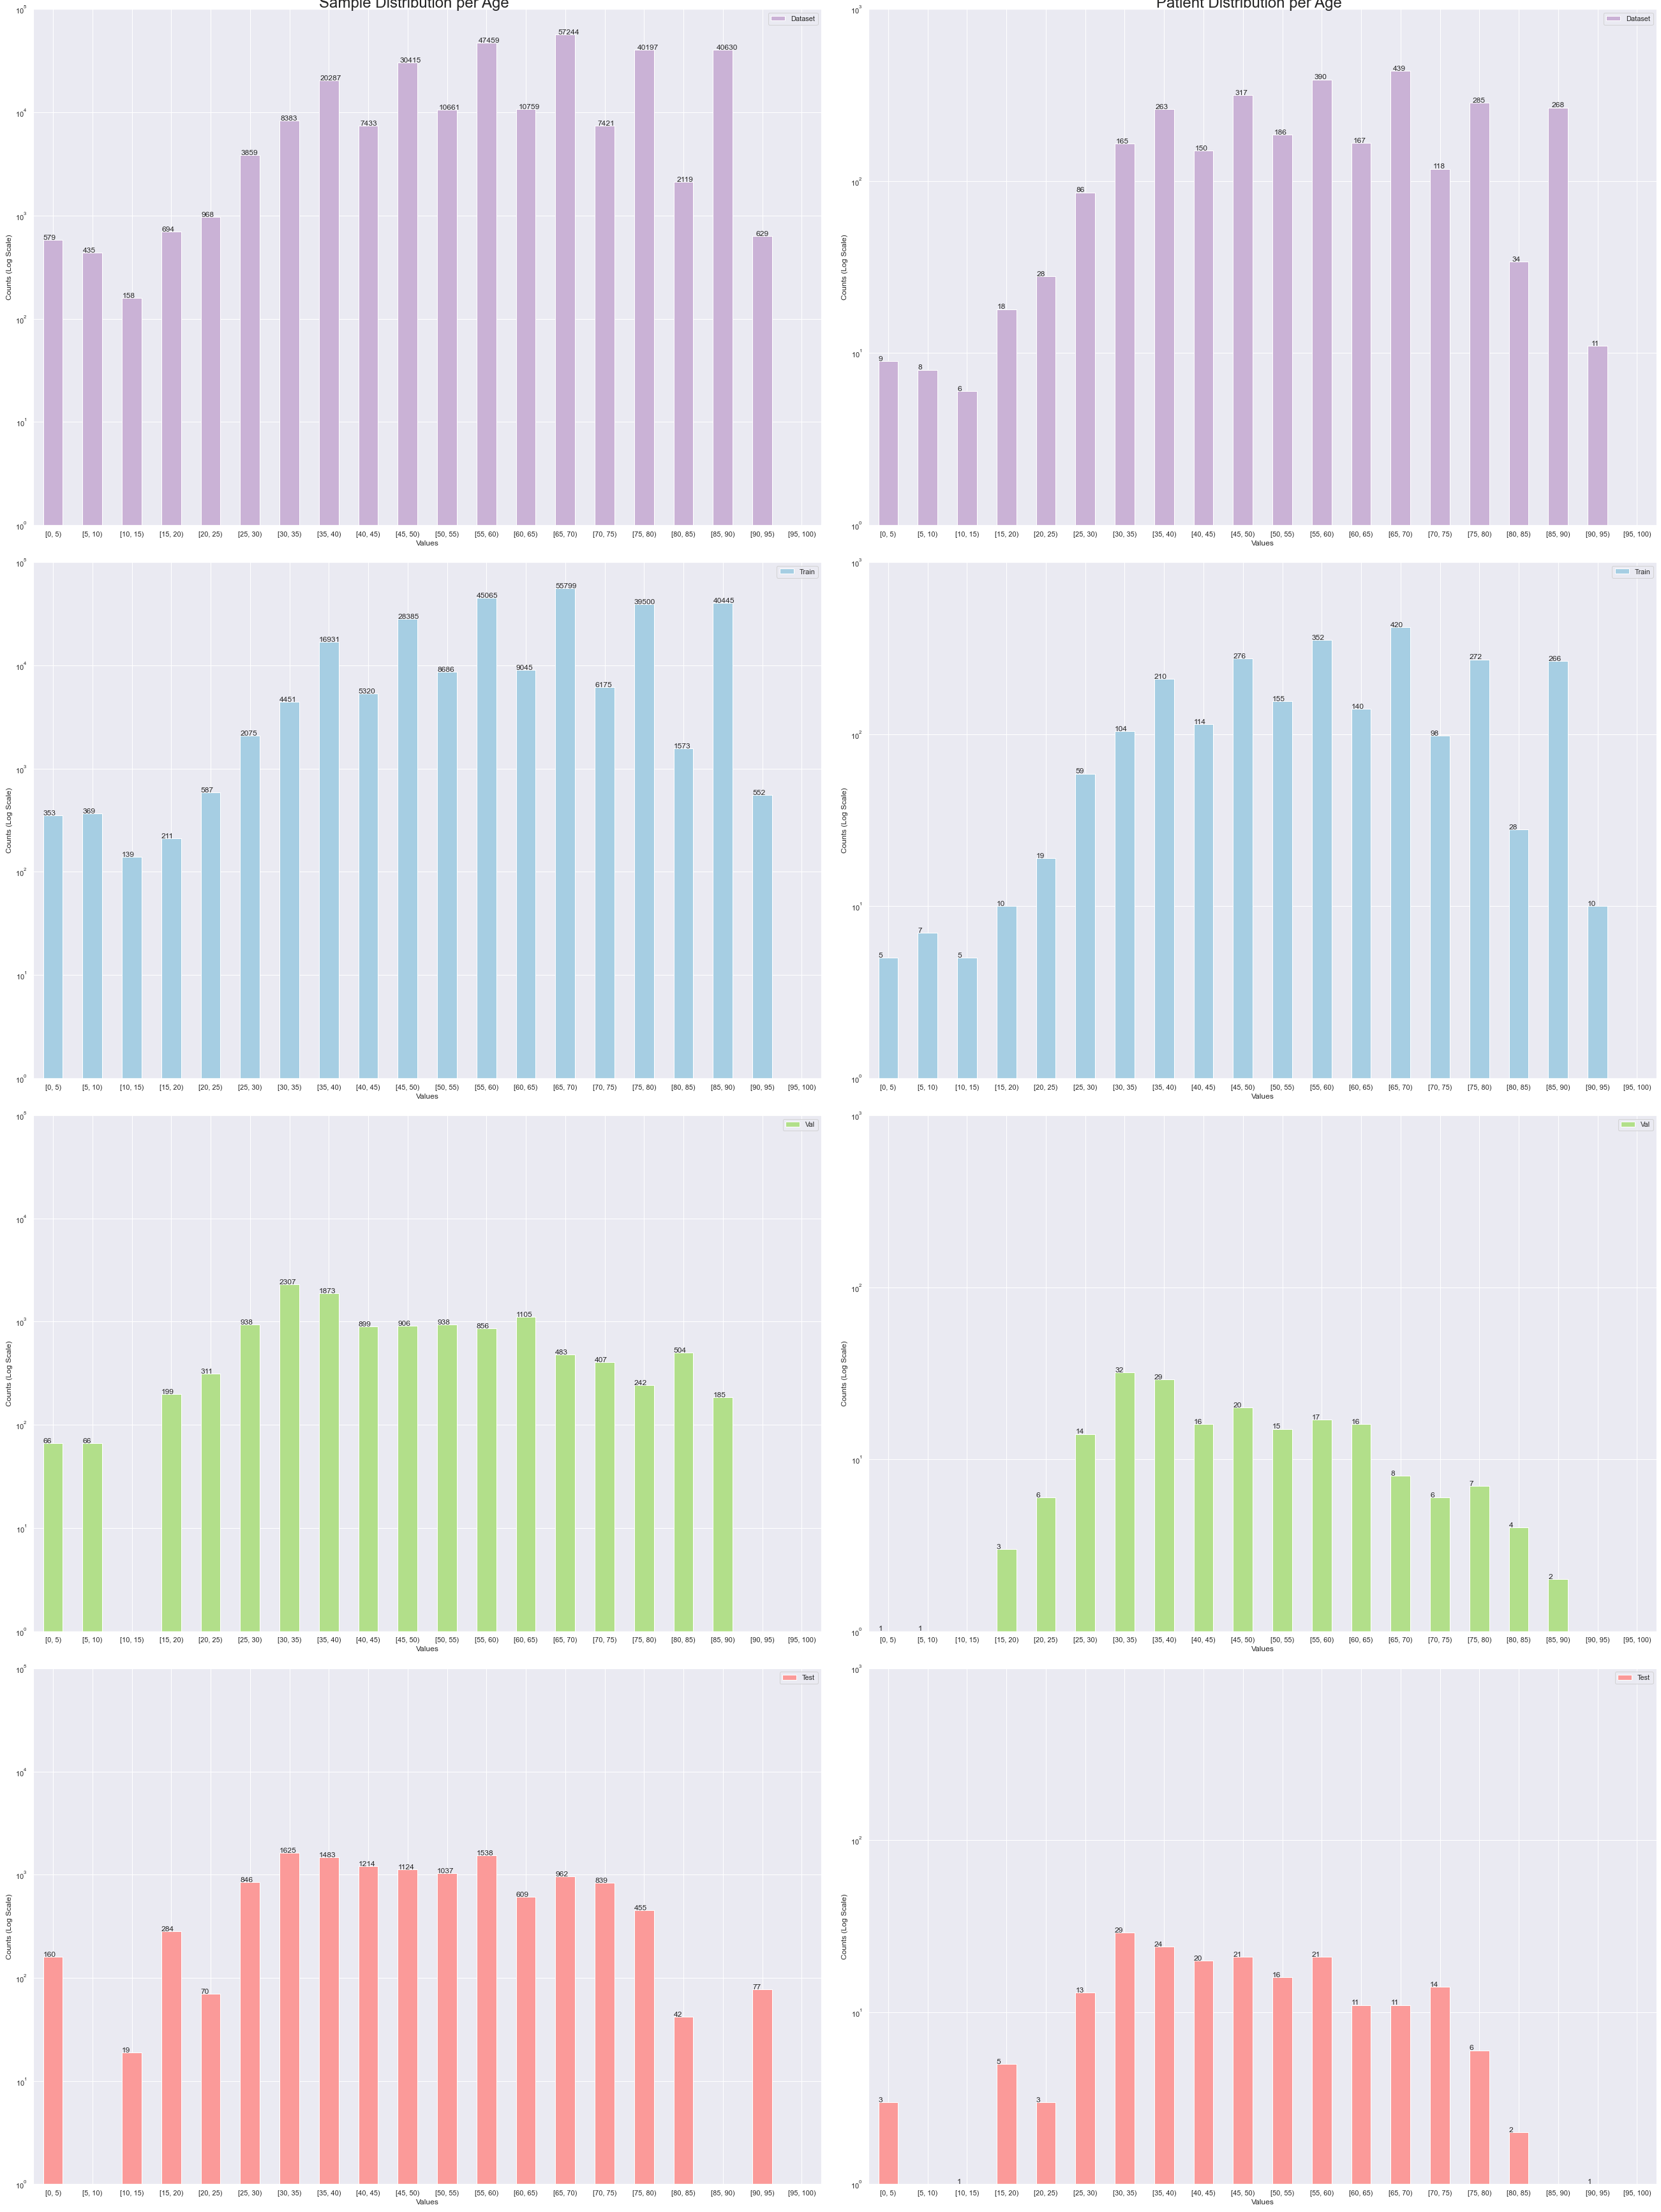

In [18]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 48))

In [19]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",579,353,66,160
"[5, 10)",435,369,66,0
"[10, 15)",158,139,0,19
"[15, 20)",694,211,199,284
"[20, 25)",968,587,311,70
"[25, 30)",3859,2075,938,846
"[30, 35)",8383,4451,2307,1625
"[35, 40)",20287,16931,1873,1483
"[40, 45)",7433,5320,899,1214


## Sex

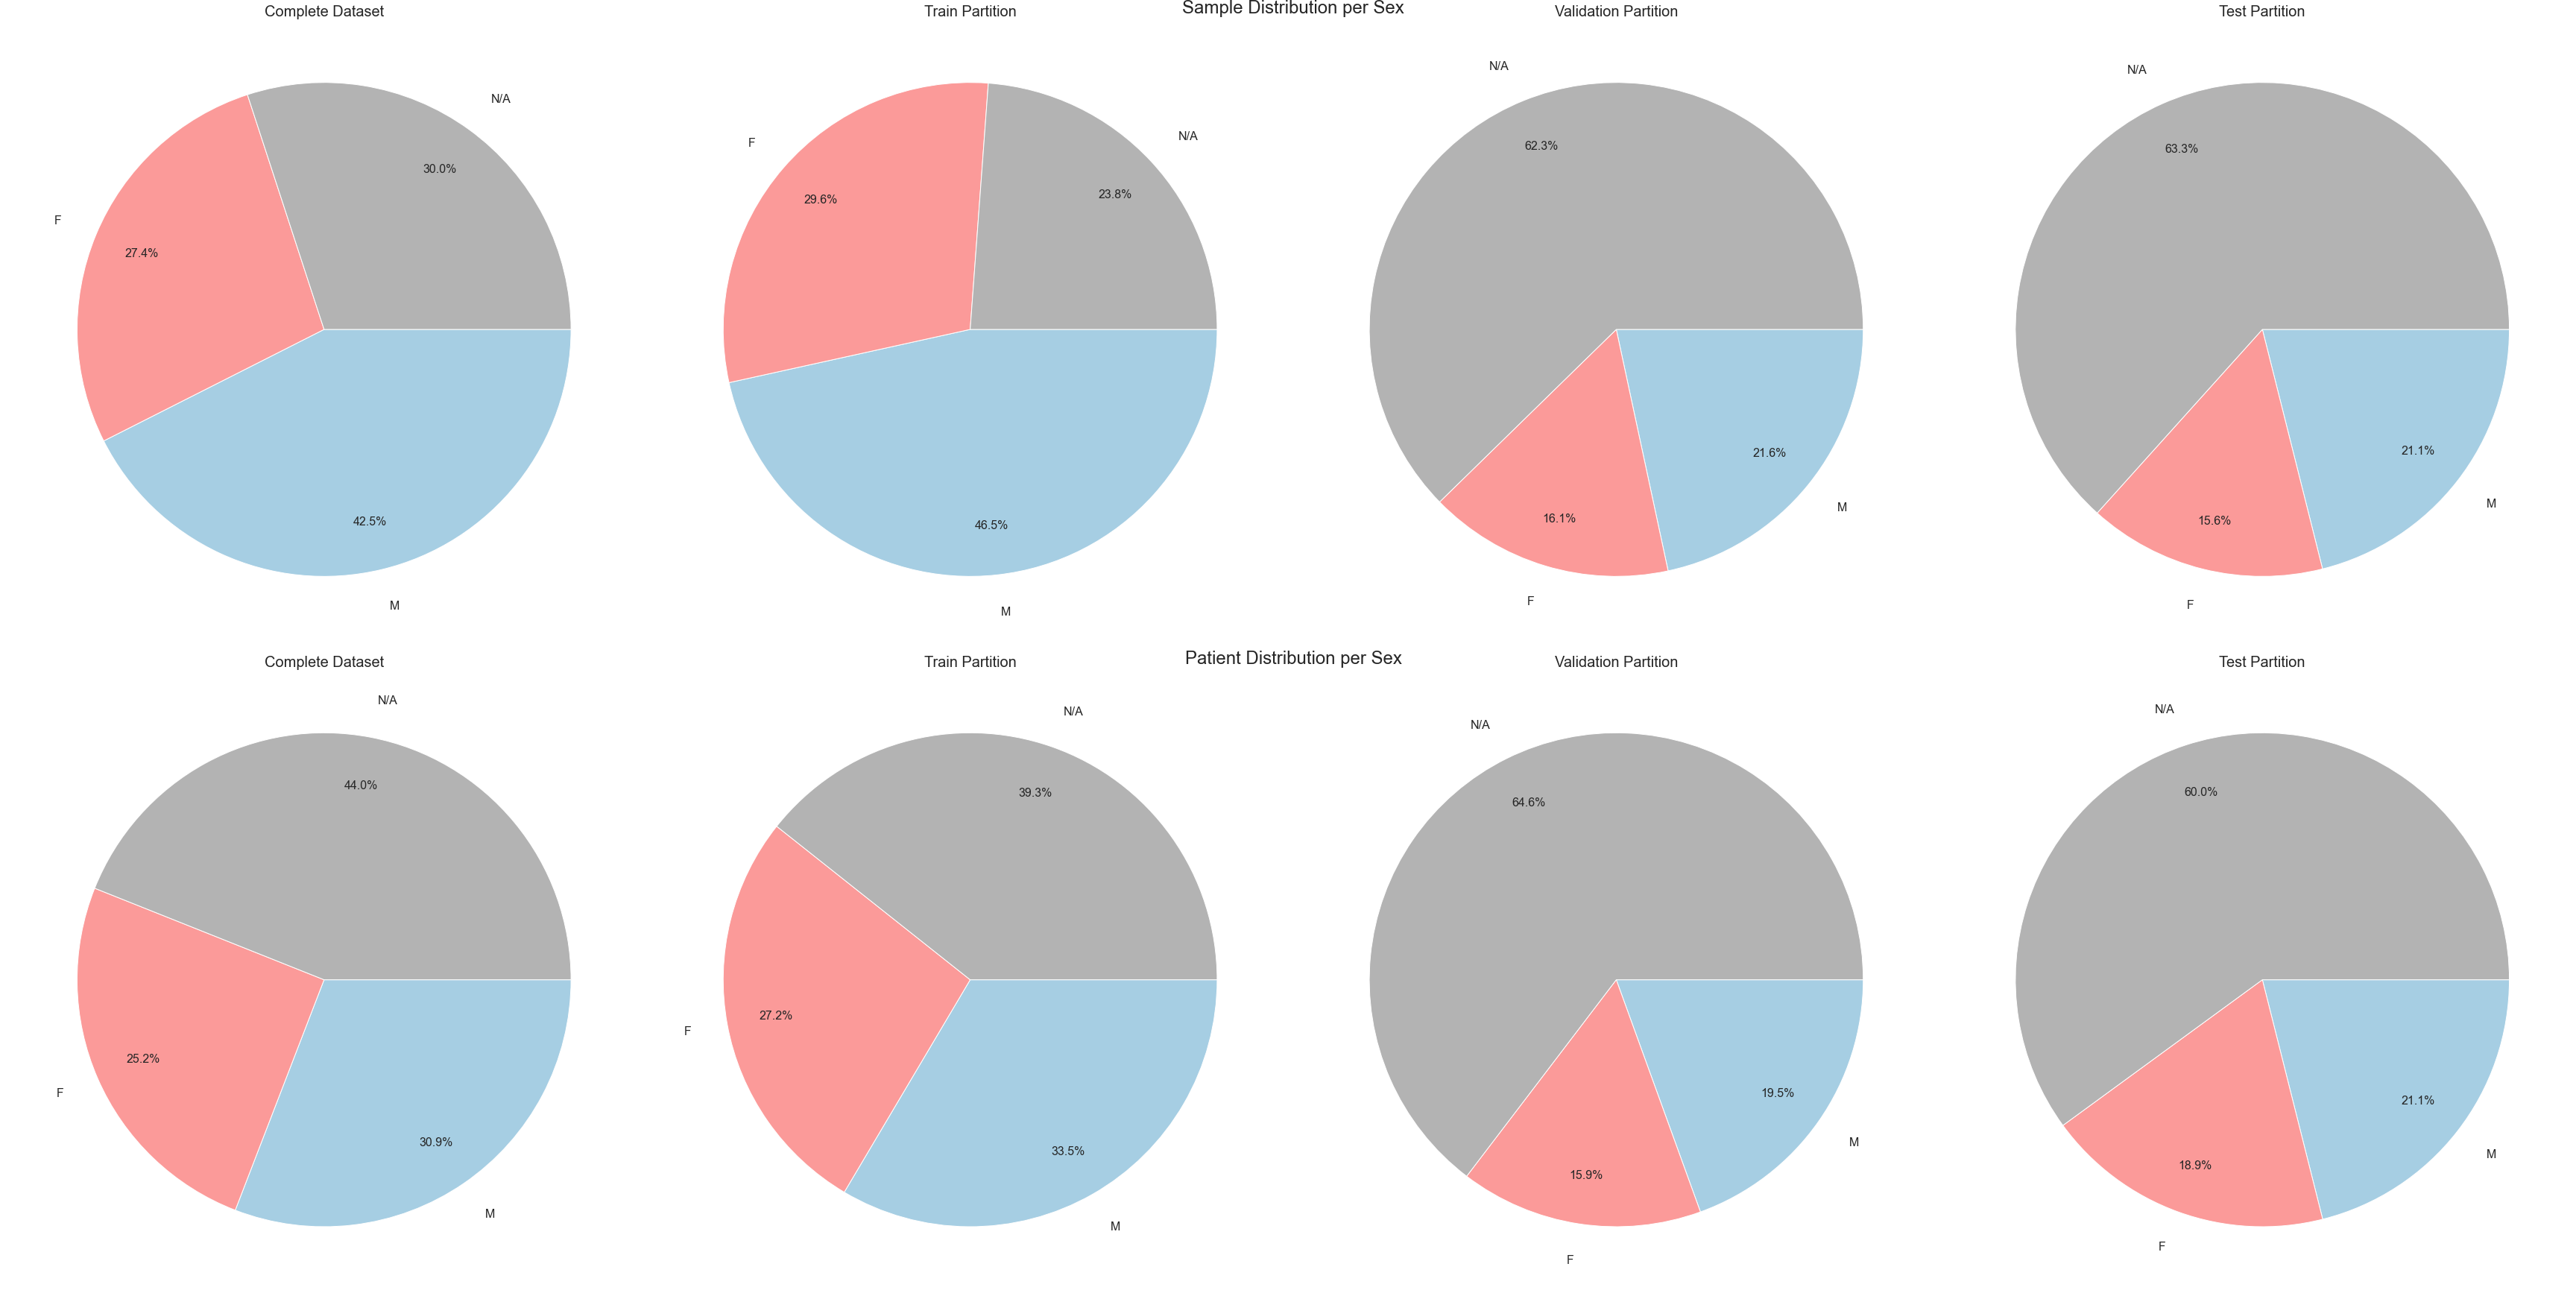

In [20]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [21]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
M,180817,166399,7296,7122
N/A,127602,85190,21015,21397
F,116605,105929,5414,5262
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
N/A,2335,1671,362,302
M,1639,1424,109,106
F,1338,1154,89,95


## Slice Selection

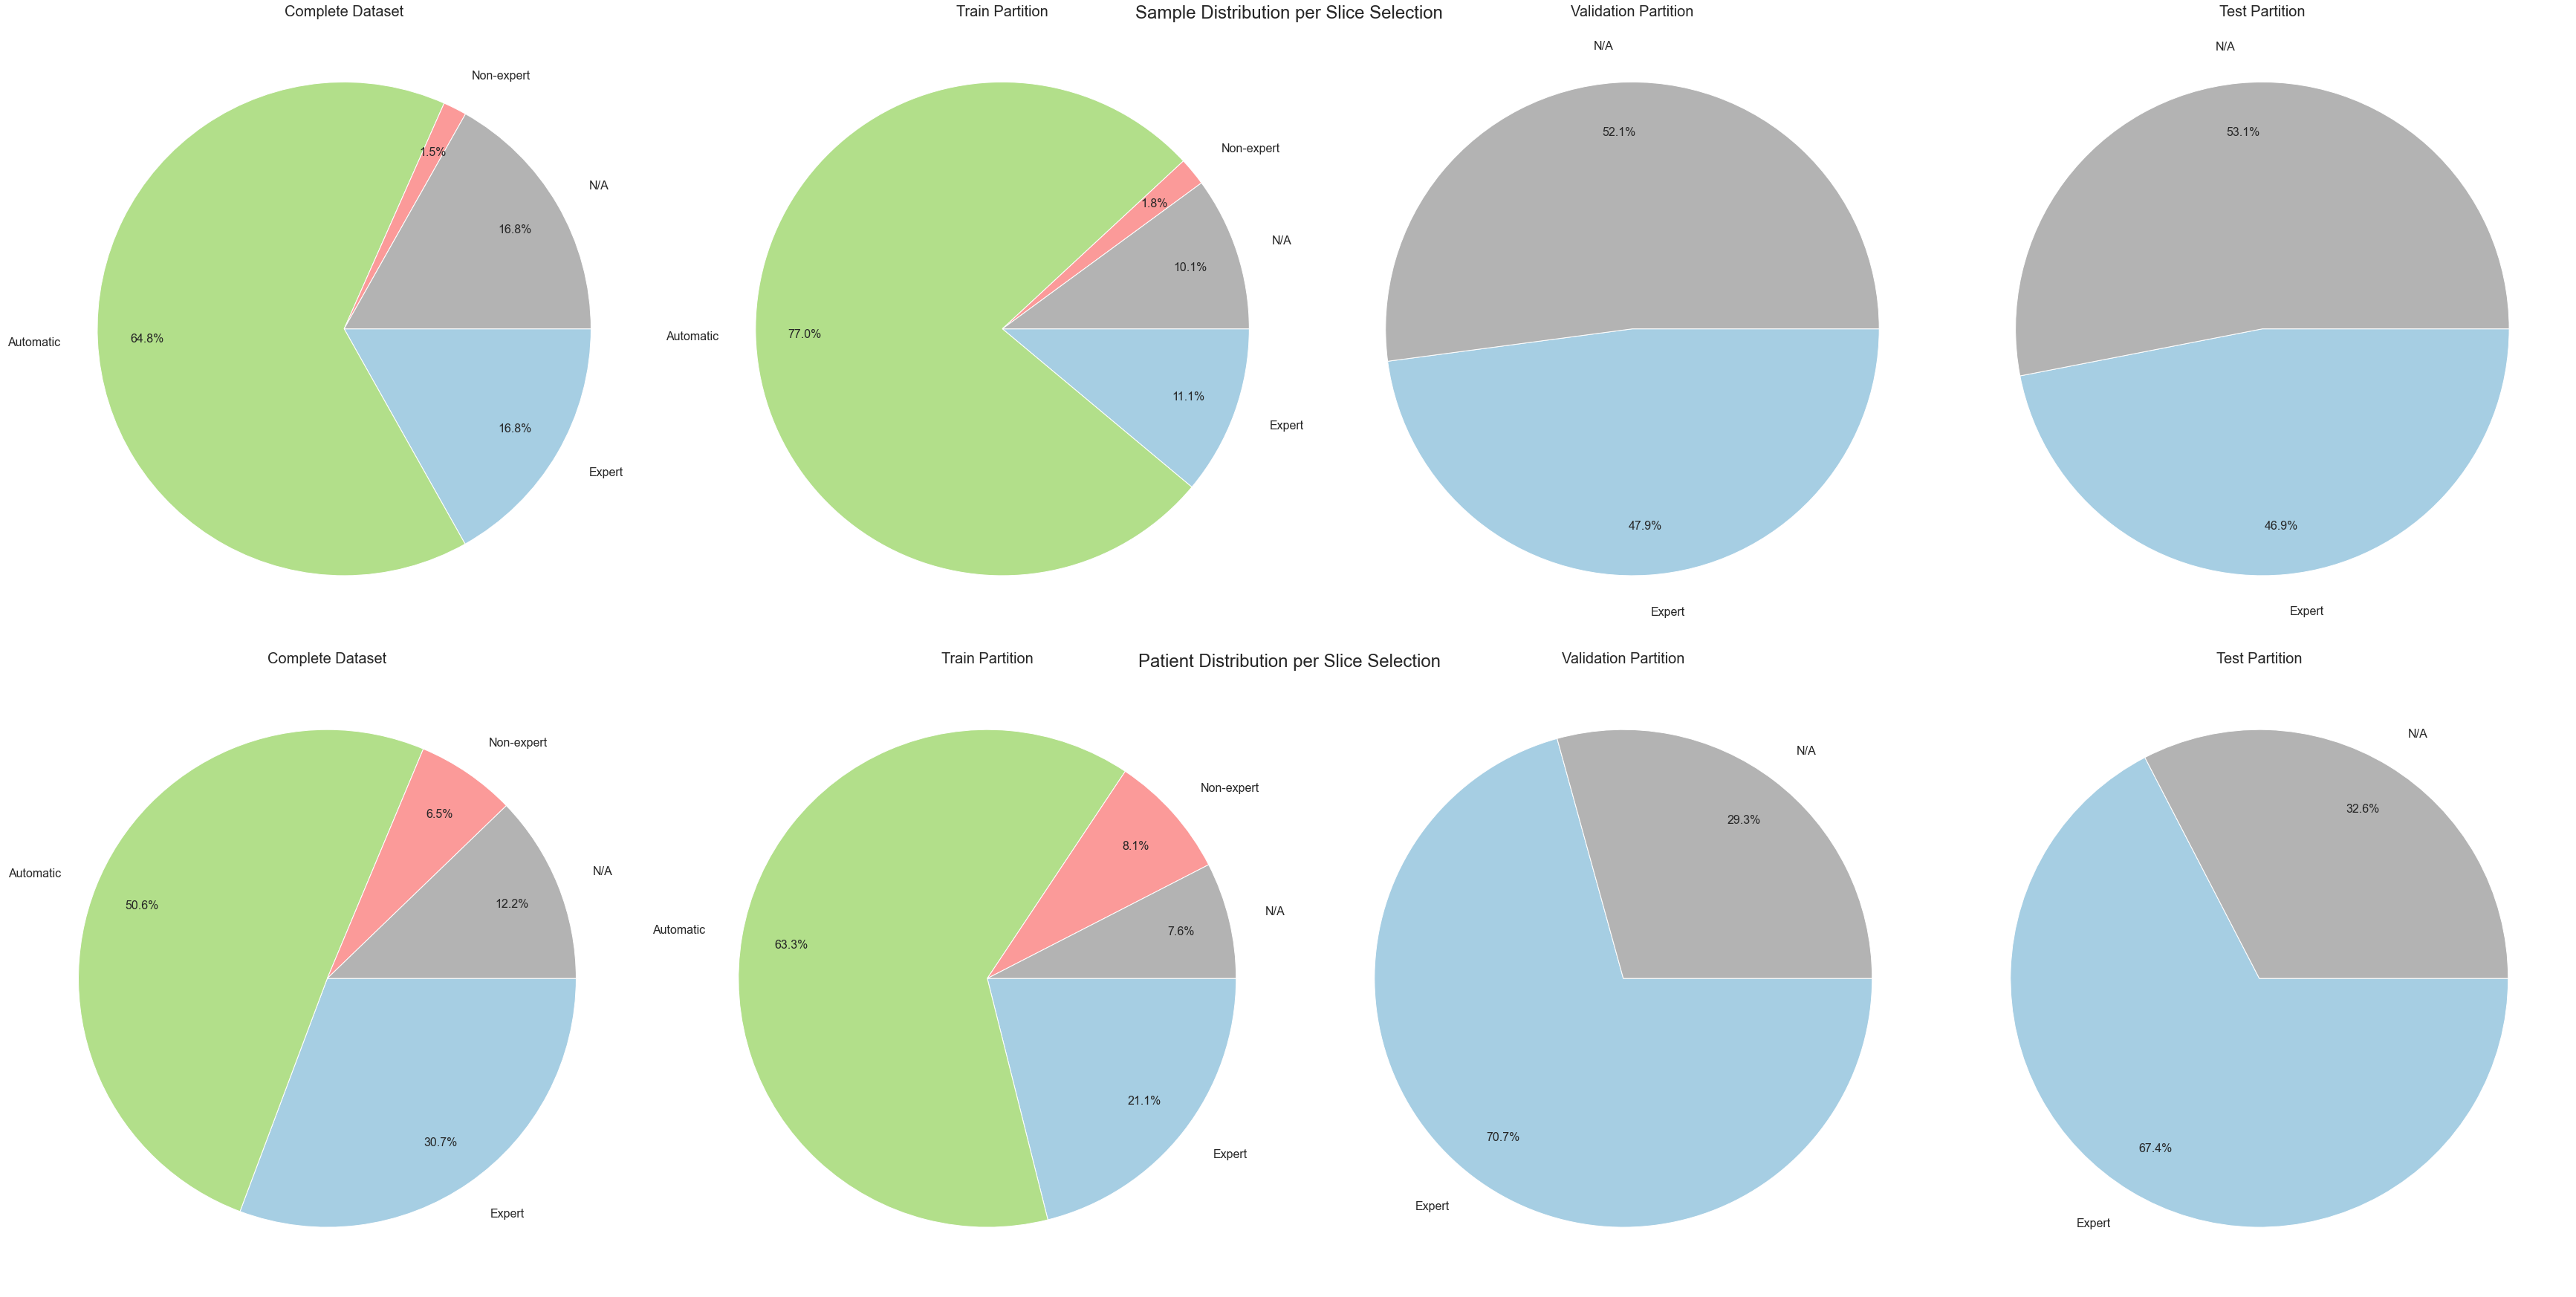

In [22]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [23]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,275366,275366,0,0
Expert,71615,39601,16155,15859
N/A,71488,35996,17570,17922
Non-expert,6555,6555,0,0
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
Automatic,2688,2688,0,0
Expert,1631,896,396,339


## Verified Findings

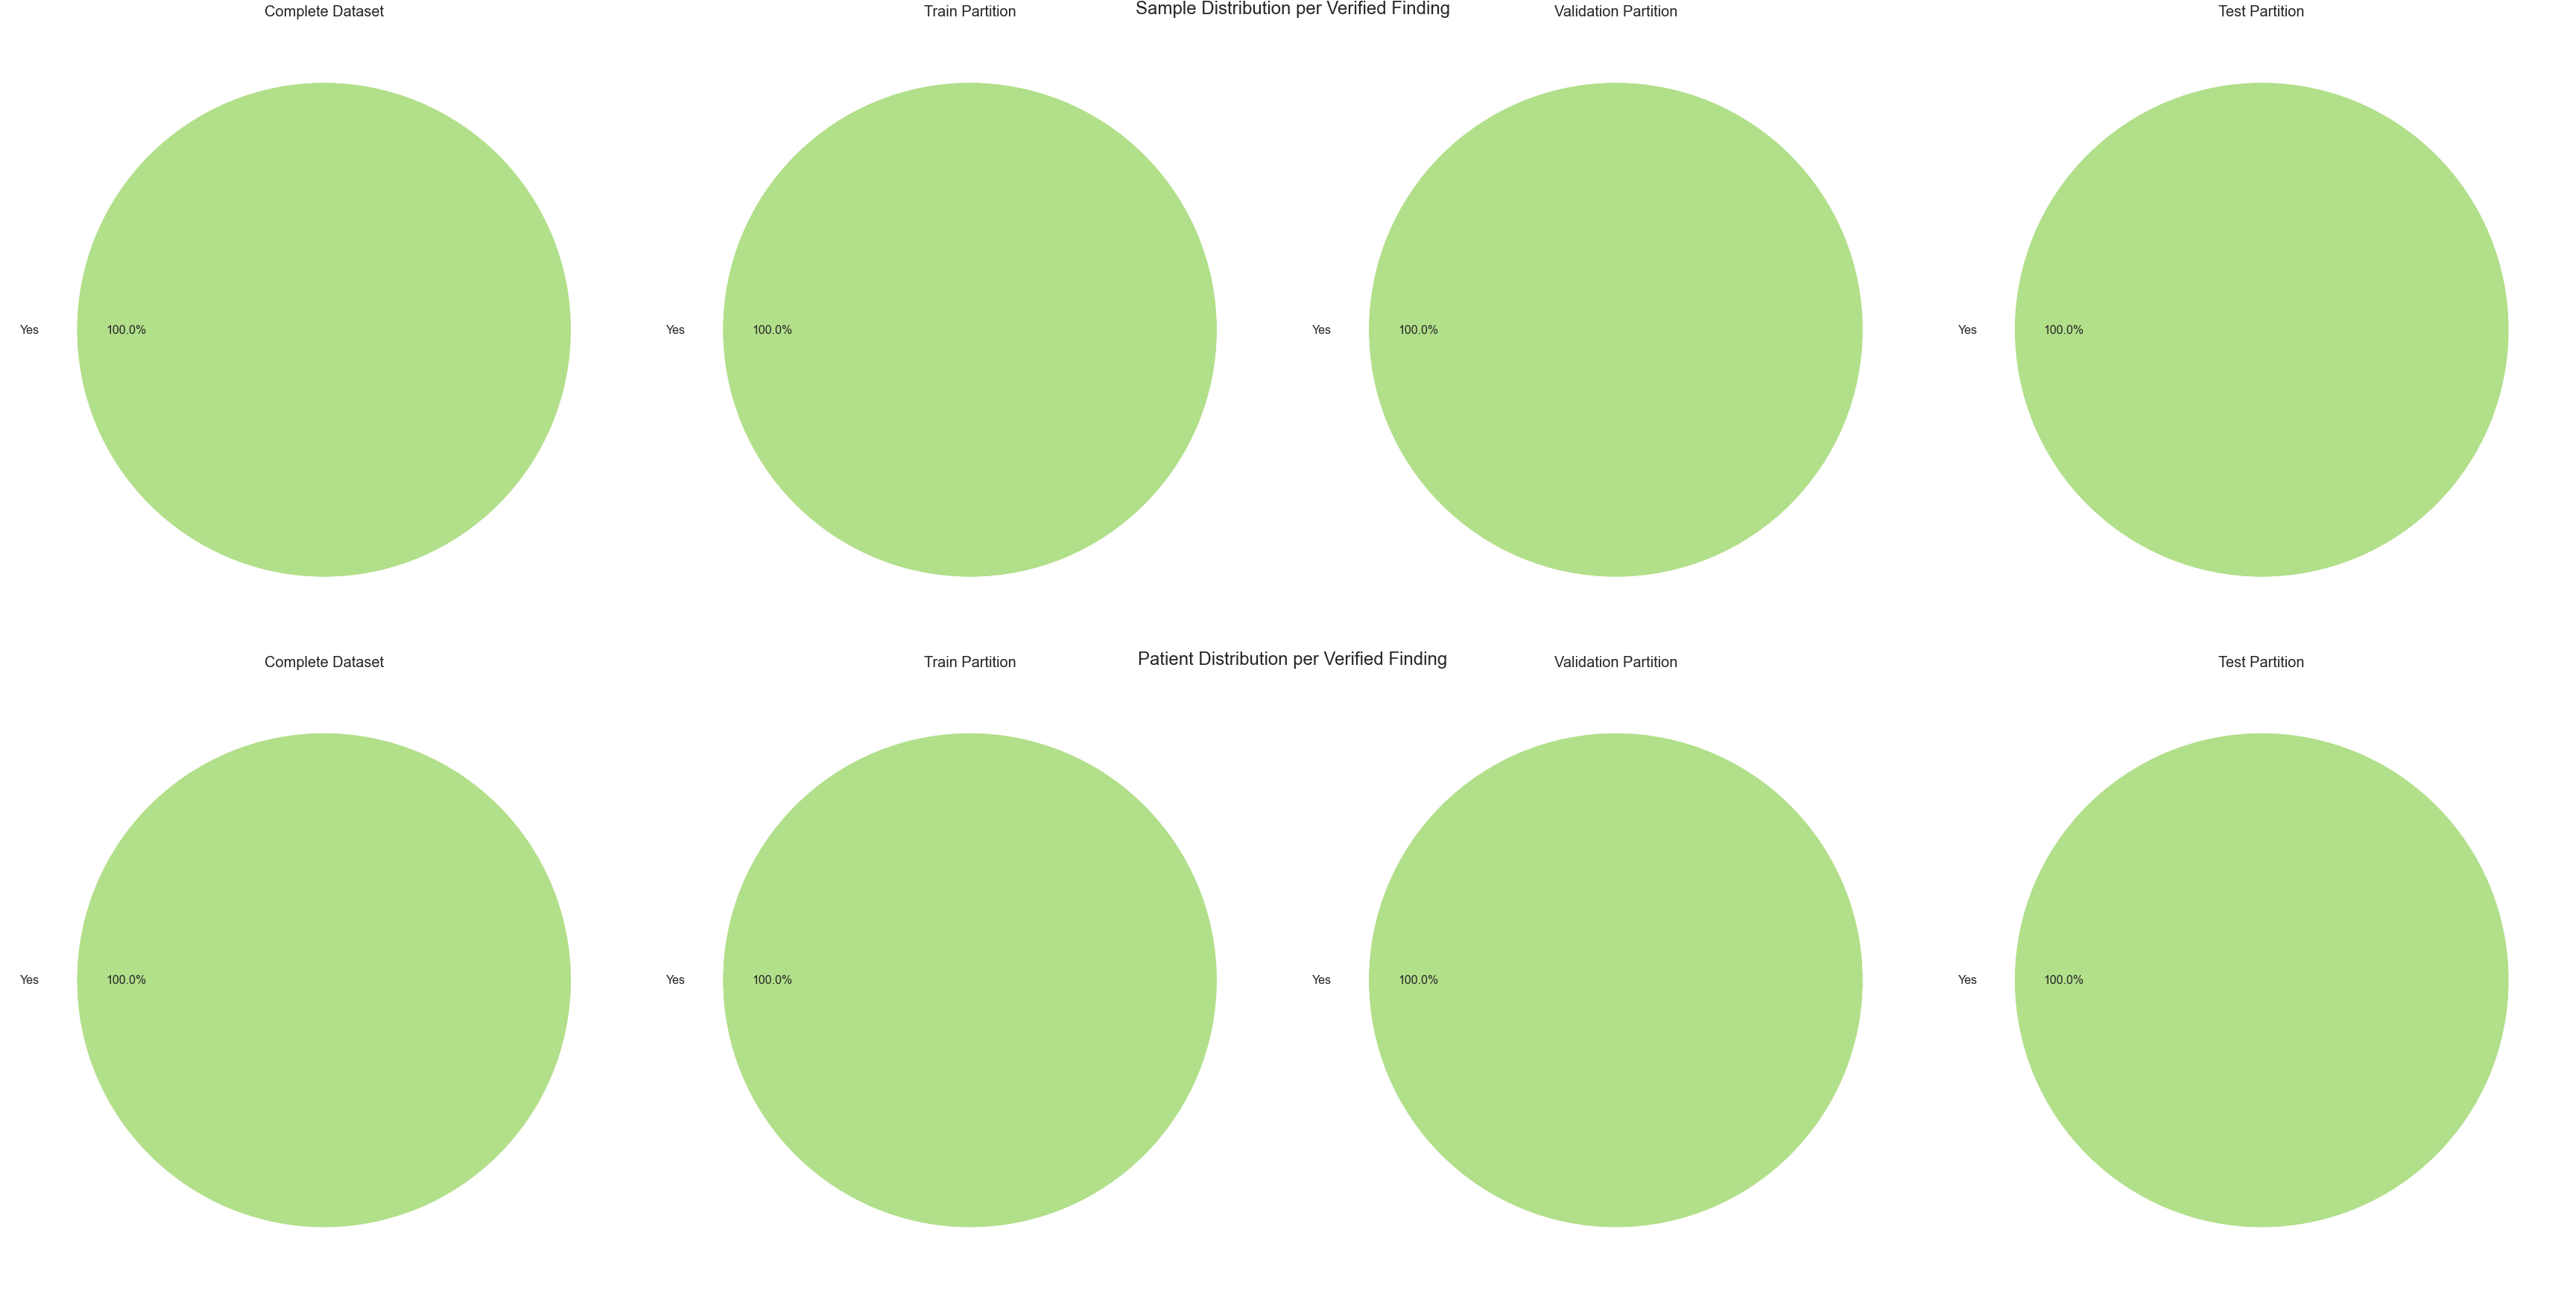

In [24]:
plot.column_as_pies( samples_df, patient_df, "verified_finding", dataset_name, figsize = (48, 24) )

In [25]:
plot.column_as_table( samples_df, patient_df, "verified_finding", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Yes,425024,357518,33725,33781
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
Yes,5312,4249,560,503
SUM,5312,4249,560,503


## View

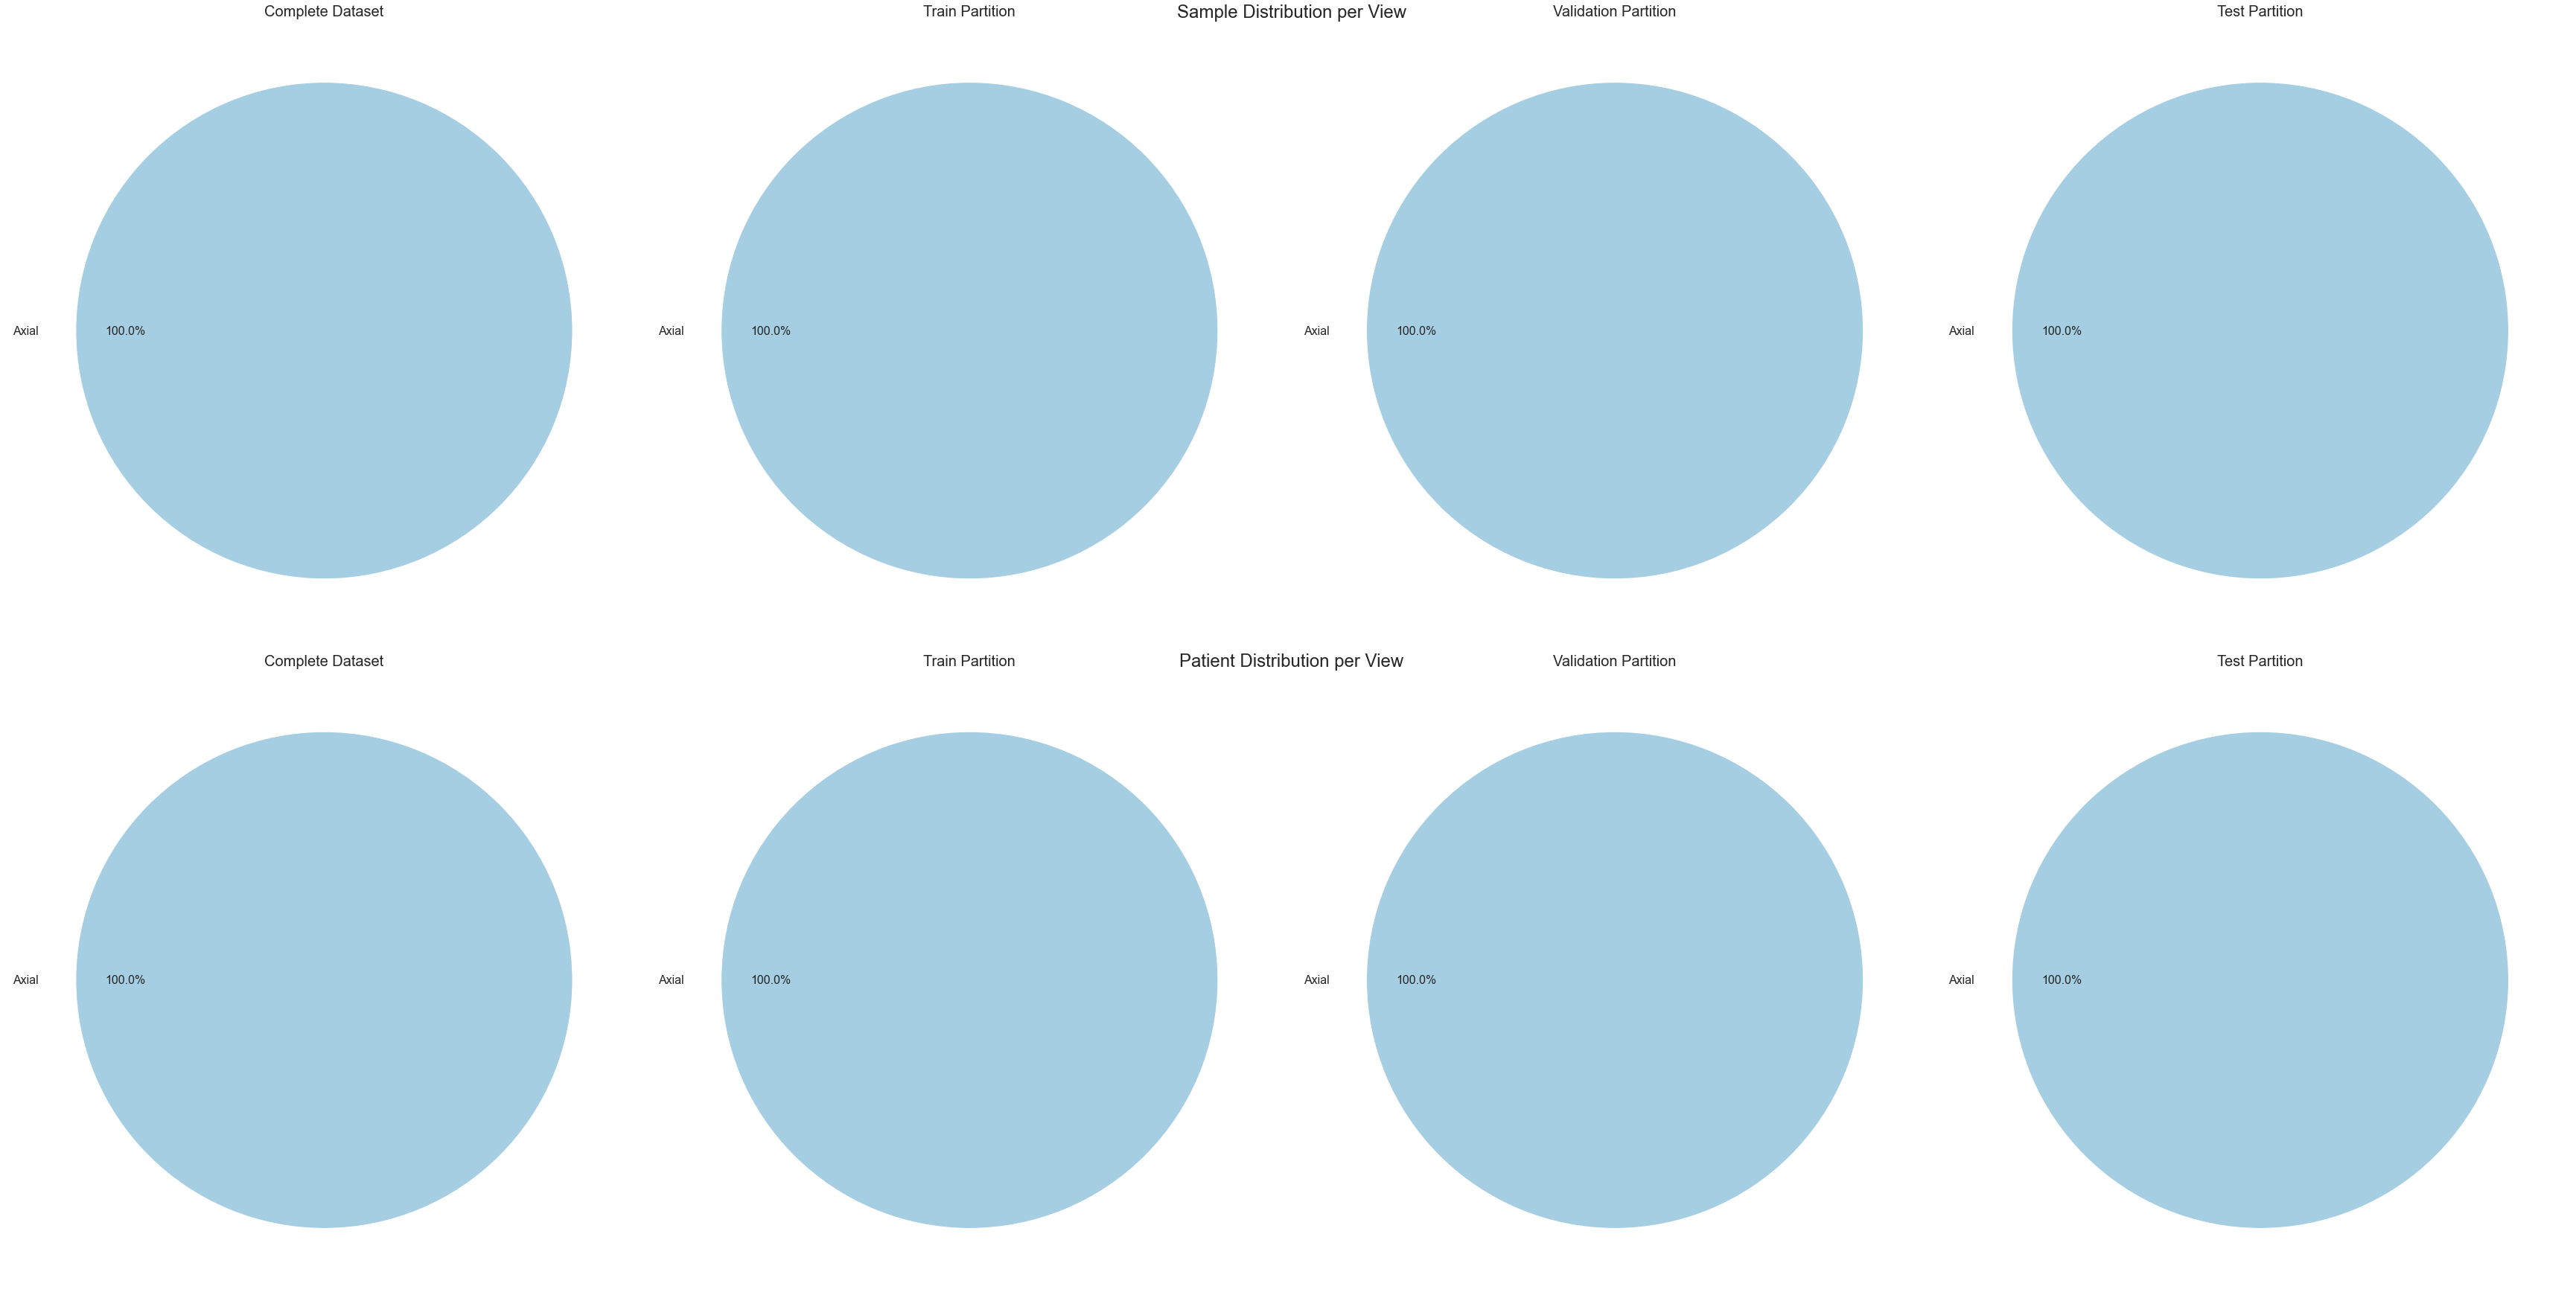

In [26]:
plot.column_as_pies( samples_df, patient_df, "view", dataset_name, figsize = (48, 24) )

In [27]:
plot.column_as_table( samples_df, patient_df, "view", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Axial,425024,357518,33725,33781
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
Axial,5312,4249,560,503
SUM,5312,4249,560,503


## Modality

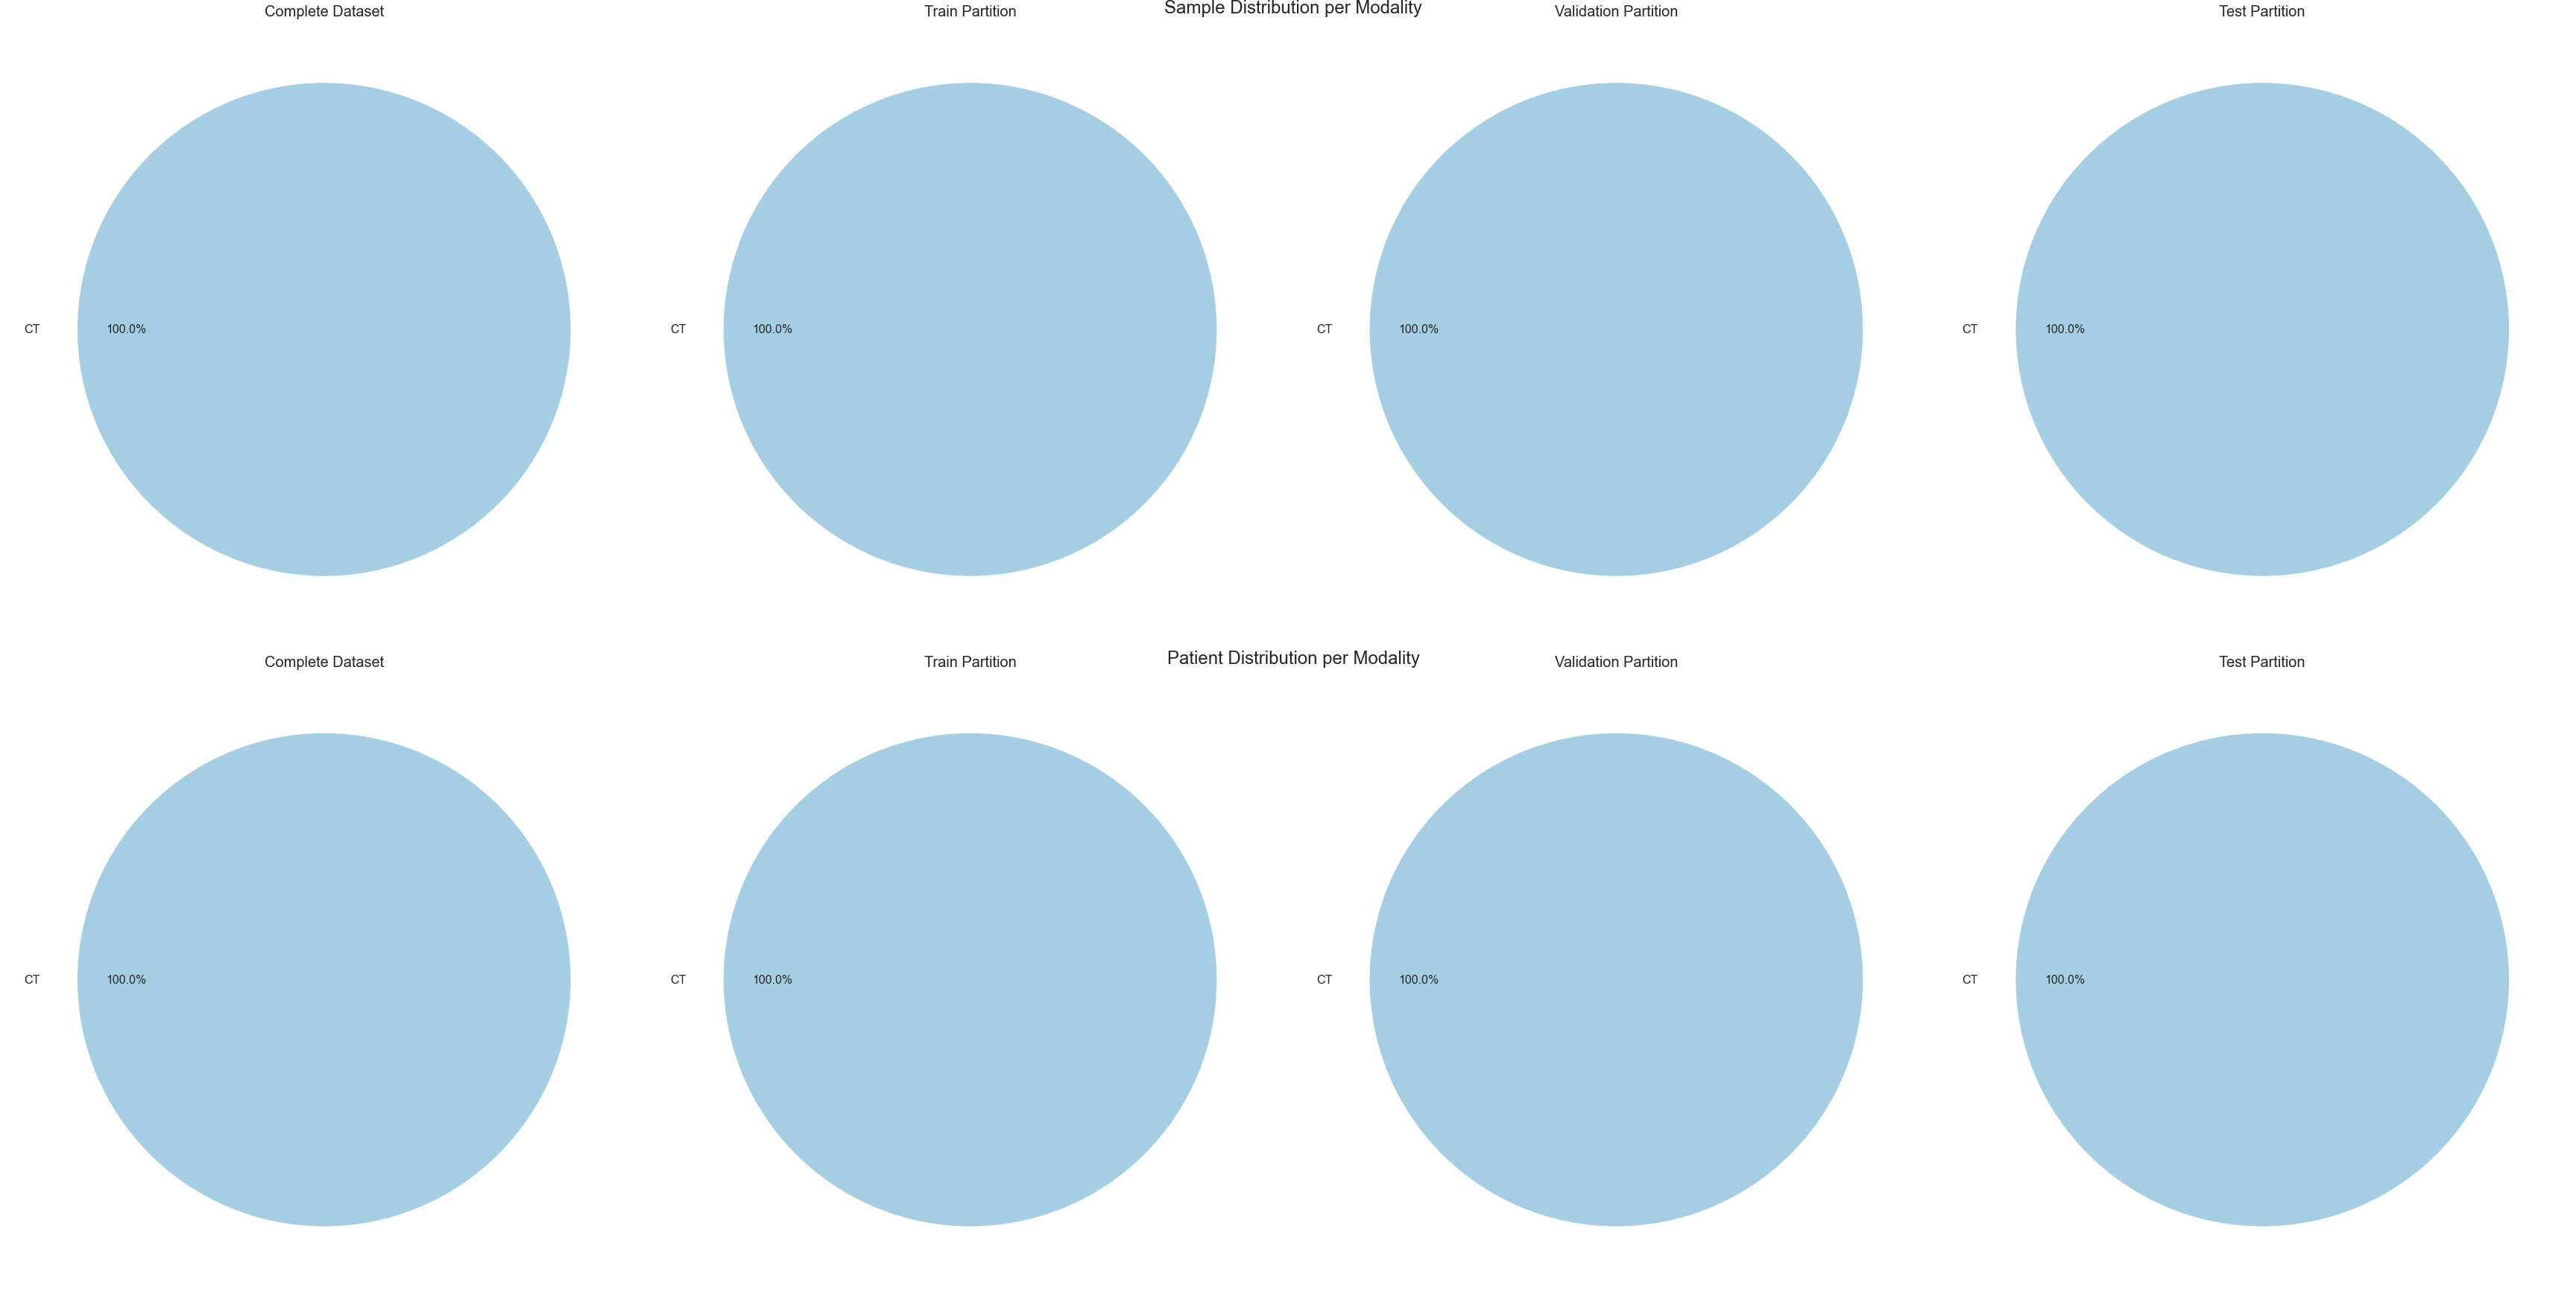

In [28]:
plot.column_as_pies( samples_df, patient_df, "modality", dataset_name, figsize = (48, 24) )

In [29]:
plot.column_as_table( samples_df, patient_df, "modality", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
CT,425024,357518,33725,33781
SUM,425024,357518,33725,33781
,Dataset,Train,Val,Test
Values,,,,
CT,5312,4249,560,503
SUM,5312,4249,560,503
